# Exploratory Data Analysis of PowerCo data
## By Saurabh Singh

## Table of Contents
- [Introduction](#Introduction)
    - [Client Data](#Client-Data)
    - [Price Data](#Price-Data)
- [Data Wrangling](#Data-Wrangling)
    - [Gathering Data](#Gathering-Data)
    - [Assessing Data](#Assessing-Data)
    - [Problems](#Problems)
    - [Cleaning Data](#Cleaning-Data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Hypothesis Testing](#Hypothesis-Testing)
    - [Results](#Results)
- [Conclusions](#Conclusions)
- [Limitations](#Limitations)

---
## Introduction

### Client Data
The dataset contains various attributes of client companies that have subscribed to the services provided by PowerCo. The features are the following:


- **id:** This is the unique identifier for each client company in the dataset. It is used to distinguish between different companies in the dataset.
- **channel_sales:** The code for the sales channel used to acquire the client. 
- **cons_12m:** The electricity consumption of the client in the past 12 months.
- **cons_gas_12m:** The gas consumption of the client in the past 12 months.
- **cons_last_month:** The electricity consumption of the client in the last month.
- **date_activ:** The date on which the contract was activated.
- **date_end:** The registered date of the end of the contract.
- **date_modif_prod:** The date of the last modification of the product.
- **date_renewal:** The date of the next contract renewal.
- **forecast_cons_12m:** The forecasted electricity consumption for the next 12 months.
- **forecast_cons_year:** The forecasted electricity consumption for the next calendar year.
- **forecast_discount_energy:** The forecasted value of the current discount.
- **forecast_meter_rent_12m:** The forecasted bill of meter rental for the next 2 months.
- **forecast_price_energy_off_peak:** This column contains the forecasted energy price for the 1st period (off-peak).
- **forecast_price_energy_peak:** The forecasted energy price for the 2nd period (peak). 
- **forecast_price_pow_off_peak:** The forecasted power price for the 1st period (off-peak).
- **has_gas:** Whether the client is also a gas consumer.
- **imp_cons:** The client's current paid consumption of electricity and/or gas.
- **margin_gross_pow_ele:** The gross margin on power subscription, which is the difference between the revenue generated from power subscription and the cost of providing the service.
- **margin_net_pow_ele:** The net margin on power subscription, which is the gross margin minus the costs of energy procurement, transportation, and distribution.
- **nb_prod_act:** The number of active products and services subscribed by the client.
- **net_margin:** The total net margin of the client, which is the revenue generated from all services provided to the client minus the costs incurred in providing those services.
- **num_years_antig:** The antiquity of the client in terms of the number of years since the client first subscribed to the services.
- **origin_up:** The code of the electricity campaign that the client first subscribed to.
- **pow_max:** The maximum power subscribed by the client.
- **churn:** Whether the client has churned or not in the next 3 months.


### Price Data
this dataset contains information about the prices of energy and power at PowerCo for different time periods and for different client companies. The fixed and variable prices provide an insight into the different pricing models used by PowerCo to bill their clients. The columns of the dataset and their meaning are as follows:

- **id:** This is the unique identifier for each client company in the dataset. It is used to distinguish between different companies in the dataset.
- **price_date:** This column contains the reference date for the prices of energy and power for each client. This could be the date on which the prices were set, or the date on which they were last updated.
- **price_off_peak_var:** This column contains the price of energy for the first period, which is typically the off-peak period when electricity demand is lower. The price may vary over time depending on market conditions and other factors.
- **price_peak_var:** This column contains the price of energy for the second period, which is typically the peak period when electricity demand is higher. The price may also vary over time.
- **price_mid_peak_var:** This column contains the price of energy for the third period, which is typically the mid-peak period between the off-peak and peak periods. As with the other energy prices, this price may also vary over time.
- **price_off_peak_fix:** This column contains the price of power for the first period, which is typically the off-peak period when electricity demand is lower. This price is typically fixed over the duration of the contract.
- **price_peak_fix:** This column contains the price of power for the second period, which is typically the peak period when electricity demand is higher. As with the off-peak power price, this price is also typically fixed over the duration of the contract.
- **price_mid_peak_fix:** This column contains the price of power for the third period, which is typically the mid-peak period between the off-peak and peak periods. This price may also be fixed over the duration of the contract.

---
## Data Wrangling
### Gathering Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from random import seed
from scipy.stats import ttest_ind

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Show all columns in a dataframe
pd.set_option('display.max_columns', None)

In [2]:
client_df = pd.read_csv('C:/Users/saura/Downloads/client_data.csv')
price_df = pd.read_csv('C:/Users/saura/Downloads/price_data.csv')

### Assessing Data

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


- missing values represented as `MISSING` in `channel_sales` column.
- has gas values are not clear and should be `boolean`.

In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [9]:
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [10]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [11]:
client_df['channel_sales'].unique()

array(['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

In [12]:
client_df['origin_up'].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', 'MISSING',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

- There are **3725** missing values in `channel_sales` column and **64** missing values in `origin_up` column of `client_df`.

In [13]:
client_df.duplicated().sum()

0

In [14]:
price_df.duplicated().sum()

0

Problems:
 - Missing values represented as MISSING in channel_sales, origin_up column.
 - Dates are of type object instead of datetime.
 - has_gas values are not clear and should be boolean.
 - Missing values in channel_sales column.

# Cleaning Data

In [15]:
client_df['channel_sales'] = client_df['channel_sales'].replace('MISSING', np.nan)
client_df['origin_up'] = client_df['origin_up'].replace('MISSING', np.nan)

In [16]:
client_df['channel_sales']

0        foosdfpfkusacimwkcsosbicdxkicaua
1                                     NaN
2        foosdfpfkusacimwkcsosbicdxkicaua
3        lmkebamcaaclubfxadlmueccxoimlema
4                                     NaN
                       ...               
14601    foosdfpfkusacimwkcsosbicdxkicaua
14602    foosdfpfkusacimwkcsosbicdxkicaua
14603    foosdfpfkusacimwkcsosbicdxkicaua
14604    foosdfpfkusacimwkcsosbicdxkicaua
14605                                 NaN
Name: channel_sales, Length: 14606, dtype: object

In [17]:
client_df['origin_up'].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', nan,
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

#### Define
Convert `date_activ`, `date_end`, `date_modif_prod` and `date_renewal` in **client_df** to `datetime`.

Convert `price_date` in **price_df** to `datetime`.
#### Code

In [18]:
def convert_to_datetime(df, columns):
    """
    This function converts the type of columns in a dataframe to datetime
    parameters:
    df: The dataframe.
    columns: a list of strings that are the columns to convert.
    """
    for col in columns:
        df[col] = pd.to_datetime(df[col])

In [19]:
convert_to_datetime(client_df, ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'])
convert_to_datetime(price_df, ['price_date'])

In [20]:
client_df[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']].dtypes


date_activ         datetime64[ns]
date_end           datetime64[ns]
date_modif_prod    datetime64[ns]
date_renewal       datetime64[ns]
dtype: object

In [21]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


#### Define
Replace `t` with `True` and `f` with `False` in `has_gas` column.
#### Code

In [22]:
client_df['has_gas'] = np.where(client_df['has_gas']=='t', True, False)

In [23]:
client_df['has_gas'].dtypes

dtype('bool')

In [24]:
client_df['has_gas'] = client_df['has_gas'].astype(int)

---
## Exploratory Data Analysis

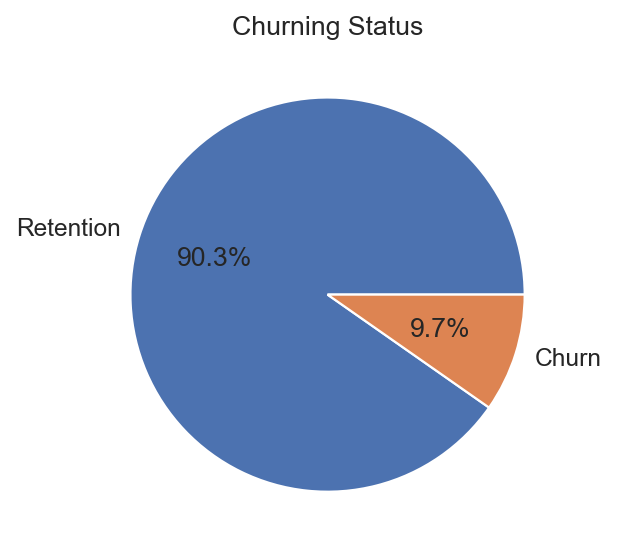

In [25]:
churned = client_df['churn'].value_counts()
plt.figure(figsize=(4,4), dpi=160)
plt.pie(churned.values, labels=['Retention','Churn'], autopct='%1.1f%%')
plt.title('Churning Status', fontsize=12)
plt.show()


**insights**
- The distribution shows that **9.7%** of customers have churned while **90.3%** are clients still for PowerCo.

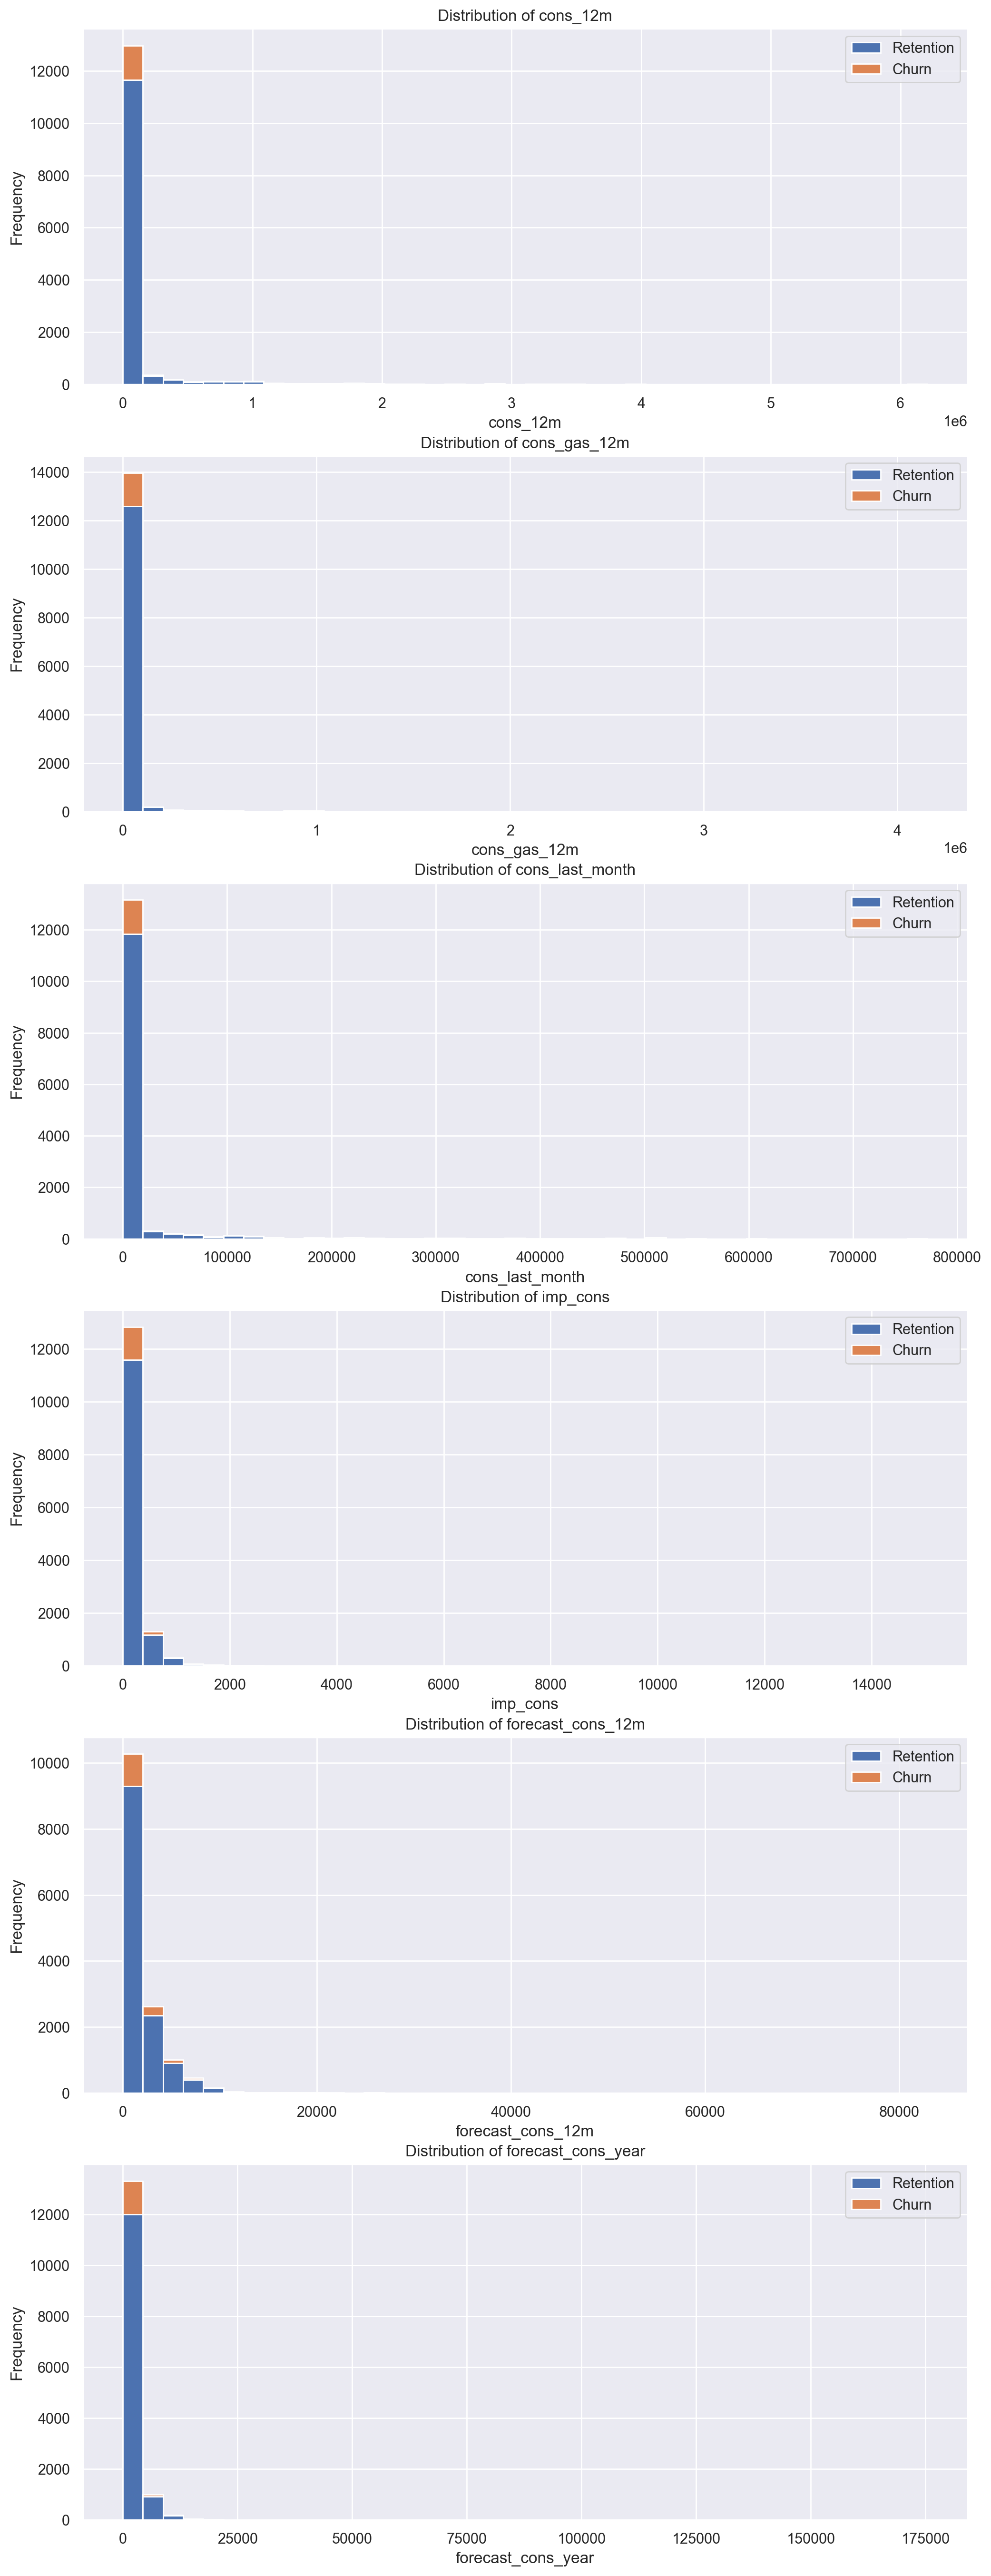

In [26]:
fig, axs = plt.subplots(6,1,figsize=(12,34), dpi=200)
for ax, column in zip(axs,['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'forecast_cons_12m', 'forecast_cons_year']):
    temp = pd.DataFrame({"Retention": client_df[client_df["churn"]==0][column],
    "Churn":client_df[client_df["churn"]==1][column]})
    temp[["Retention","Churn"]].plot(kind='hist', bins=40, ax=ax, stacked=True)
    ax.set_xlabel(column)
    ax.set_title(f'Distribution of {column}')
plt.show()


**Insights**
- The distribution of the features is highly positively skewed.

> The distributions are highly concenterated on a certain range. A logarithmic scale will show more information.

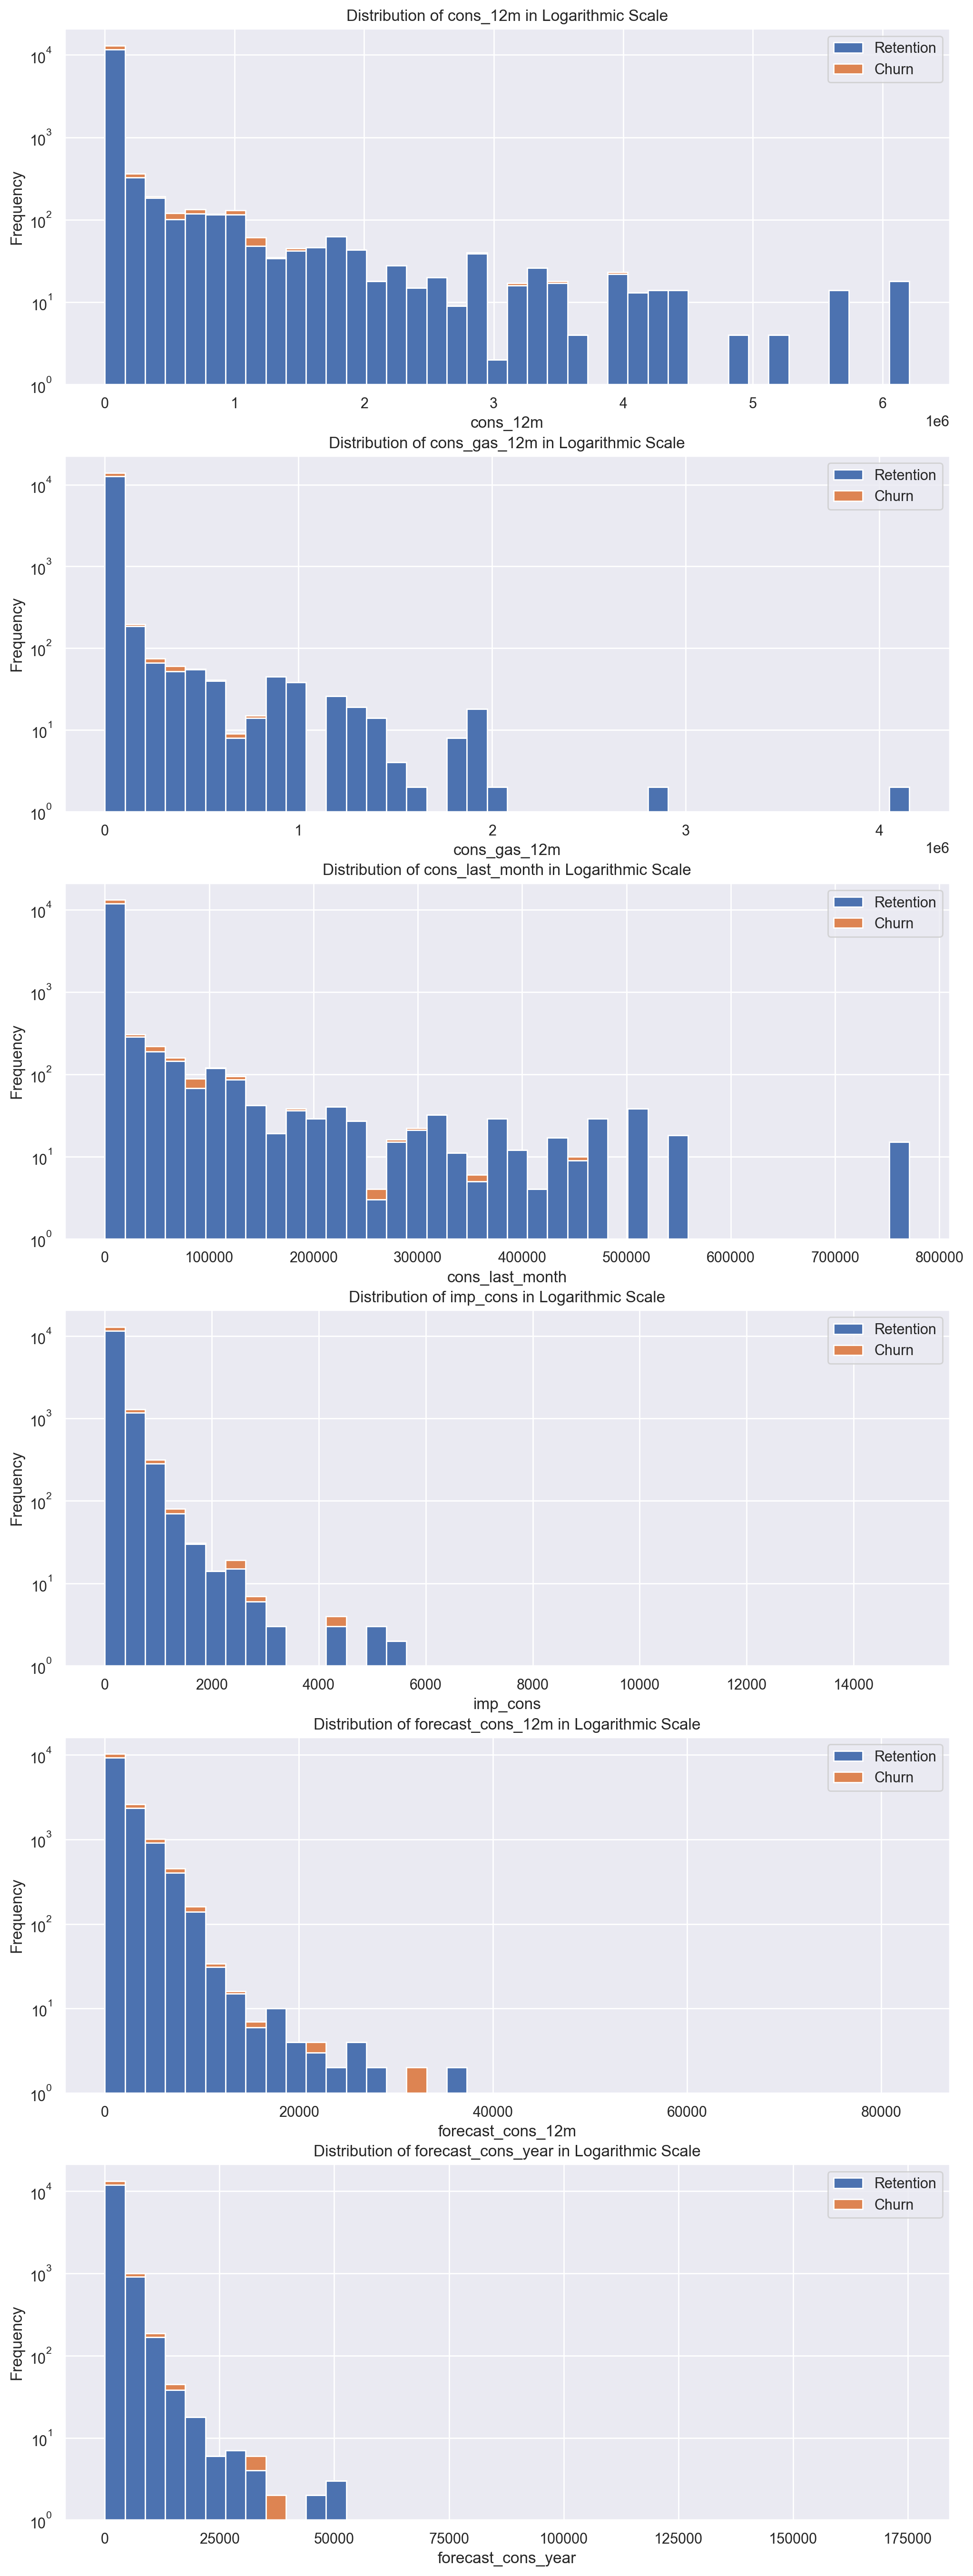

In [27]:
fig, axs = plt.subplots(6,1,figsize=(12,34), dpi=200)
for ax, column in zip(axs,['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'forecast_cons_12m', 'forecast_cons_year']):
    temp = pd.DataFrame({"Retention": client_df[client_df["churn"]==0][column],
    "Churn":client_df[client_df["churn"]==1][column]})
    temp[["Retention","Churn"]].plot(kind='hist', bins=40, ax=ax, stacked=True)
    ax.set_xlabel(column)
    ax.set_title(f'Distribution of {column} in Logarithmic Scale')
    ax.set_yscale('log')
plt.show()

**Insights**
- The distribution of all consumption features is highly positively skewed.
- There are very few SME that consume relatively larger amounts of energy or gas than the absolute majority of other clients.

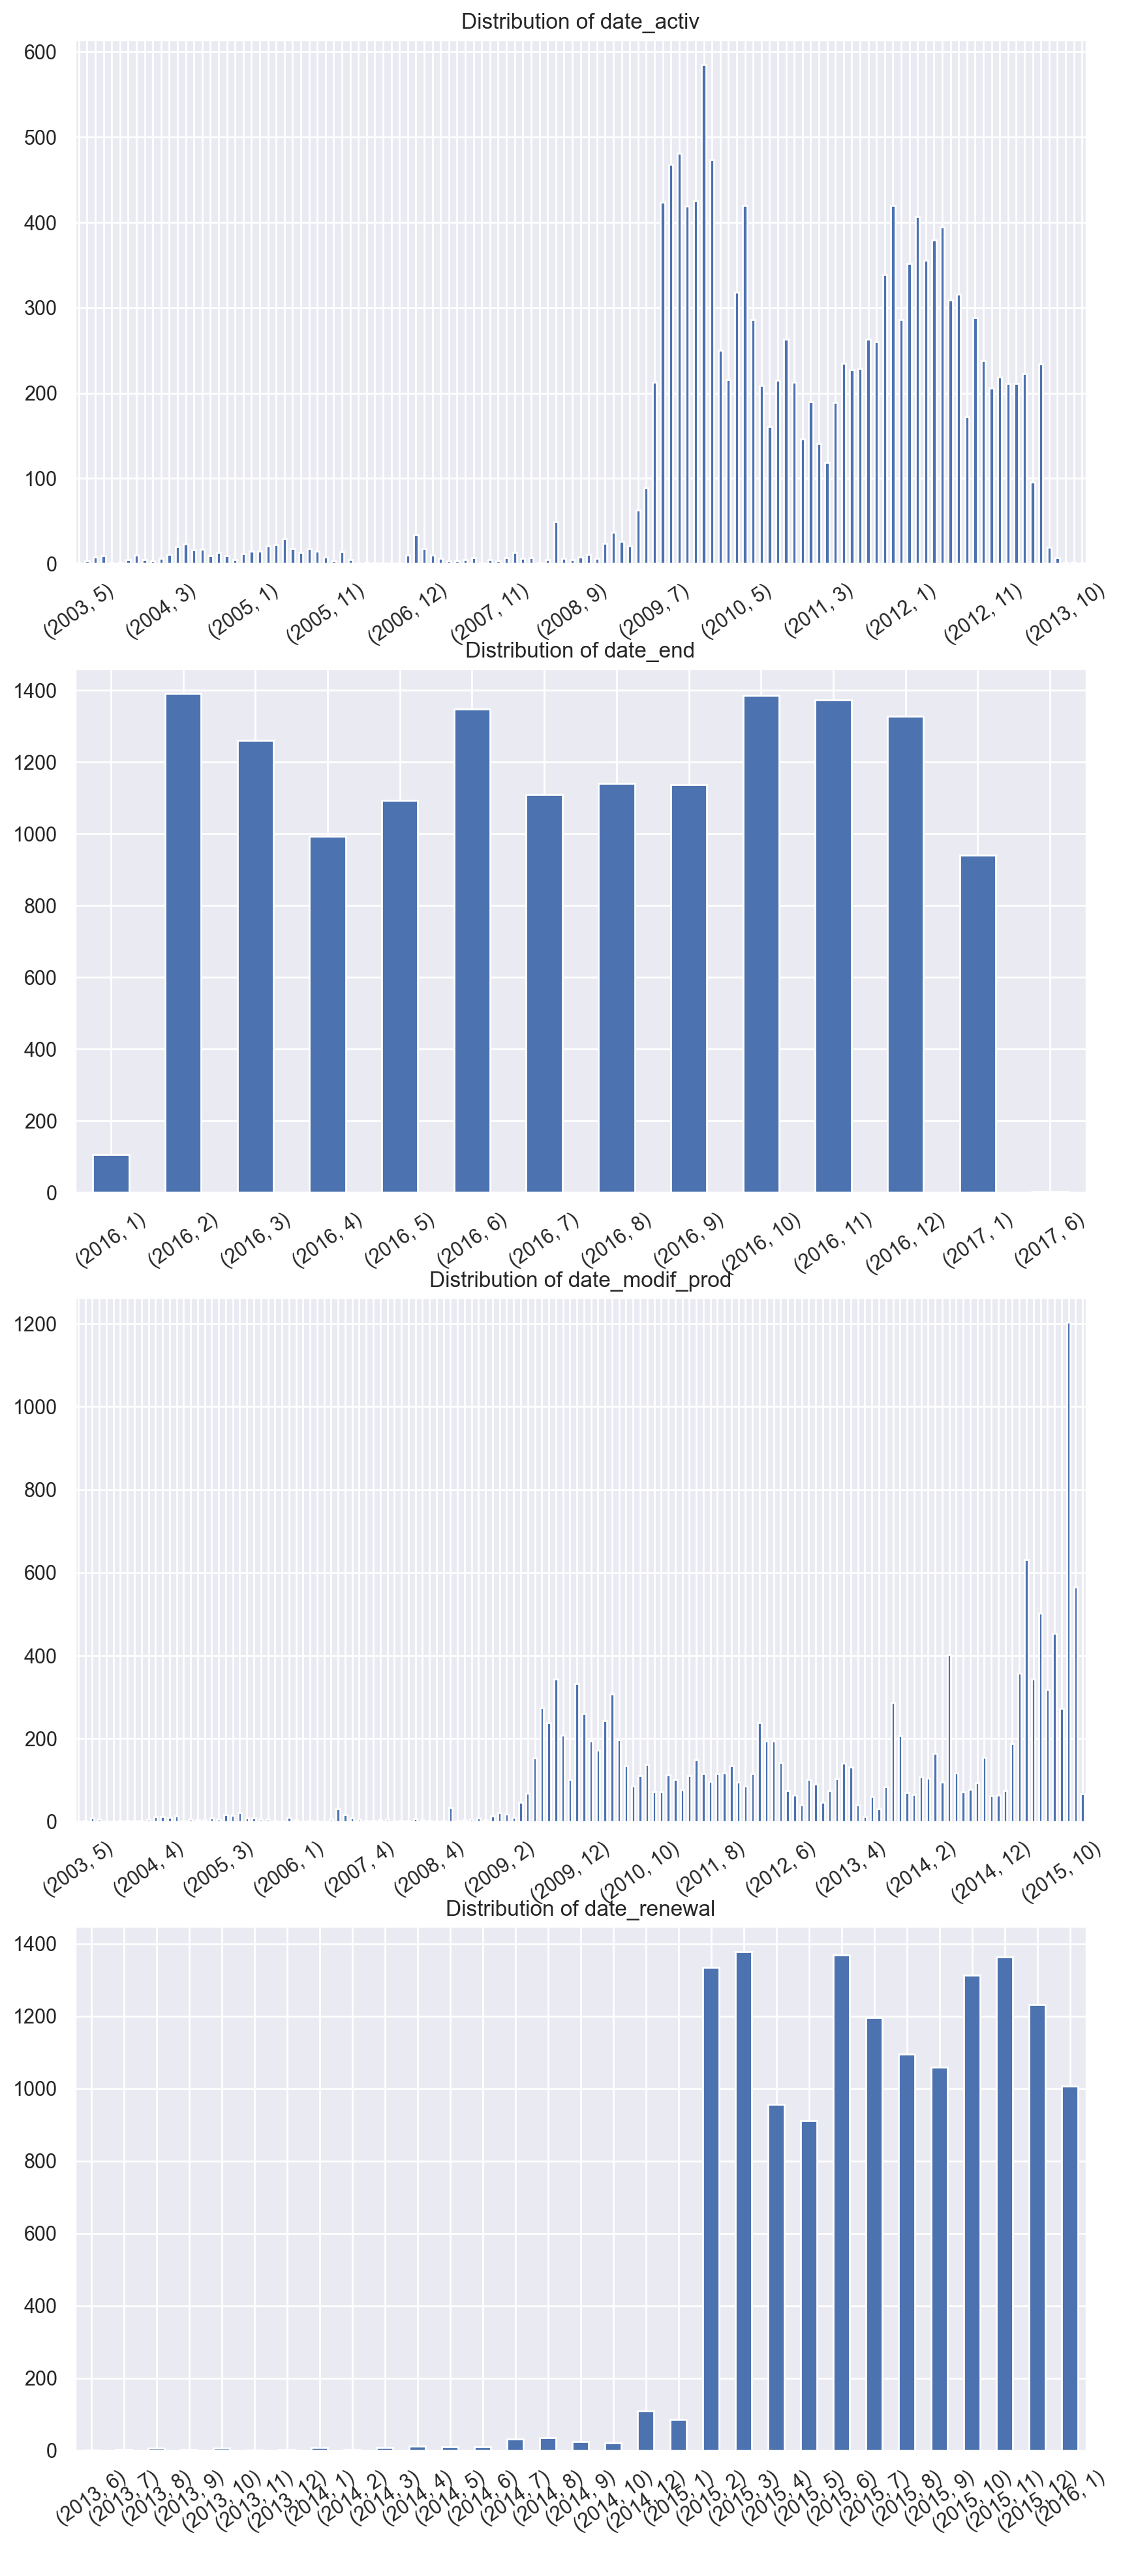

In [28]:
fig, axs = plt.subplots(4,1,figsize=(10,24), dpi=200)
for ax, column in zip(axs,['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']):
    temp = client_df[column].value_counts()
    client_df.groupby([client_df[column].dt.year, client_df[column].dt.month])['id'].count().plot(kind="bar", ax=ax)
    # sns.histplot(temp, bins=20, ax=ax)
    ax.set_xlabel(' ')
    ax.set_title(f'Distribution of {column}')
    plt.xticks(rotation = 45)
    xticks = ax.xaxis.get_major_ticks()
    if len(xticks)>40:
        for i in range(len(xticks)):
            if i%10 != 0:
                xticks[i].label1.set_visible(False)
    for tick in ax.get_xticklabels():
        tick.set_rotation(35)
plt.show()

**Insights**
- Most customers are acquired between mid 2009 and the beginning 2013.
- All the contracts in the dataset will expire on 2016 or January, 2017.
- With the increase in customer acquisition, there was an increase in modifications of the product.
- Most contracts are scheduled to be renewed by 2015.

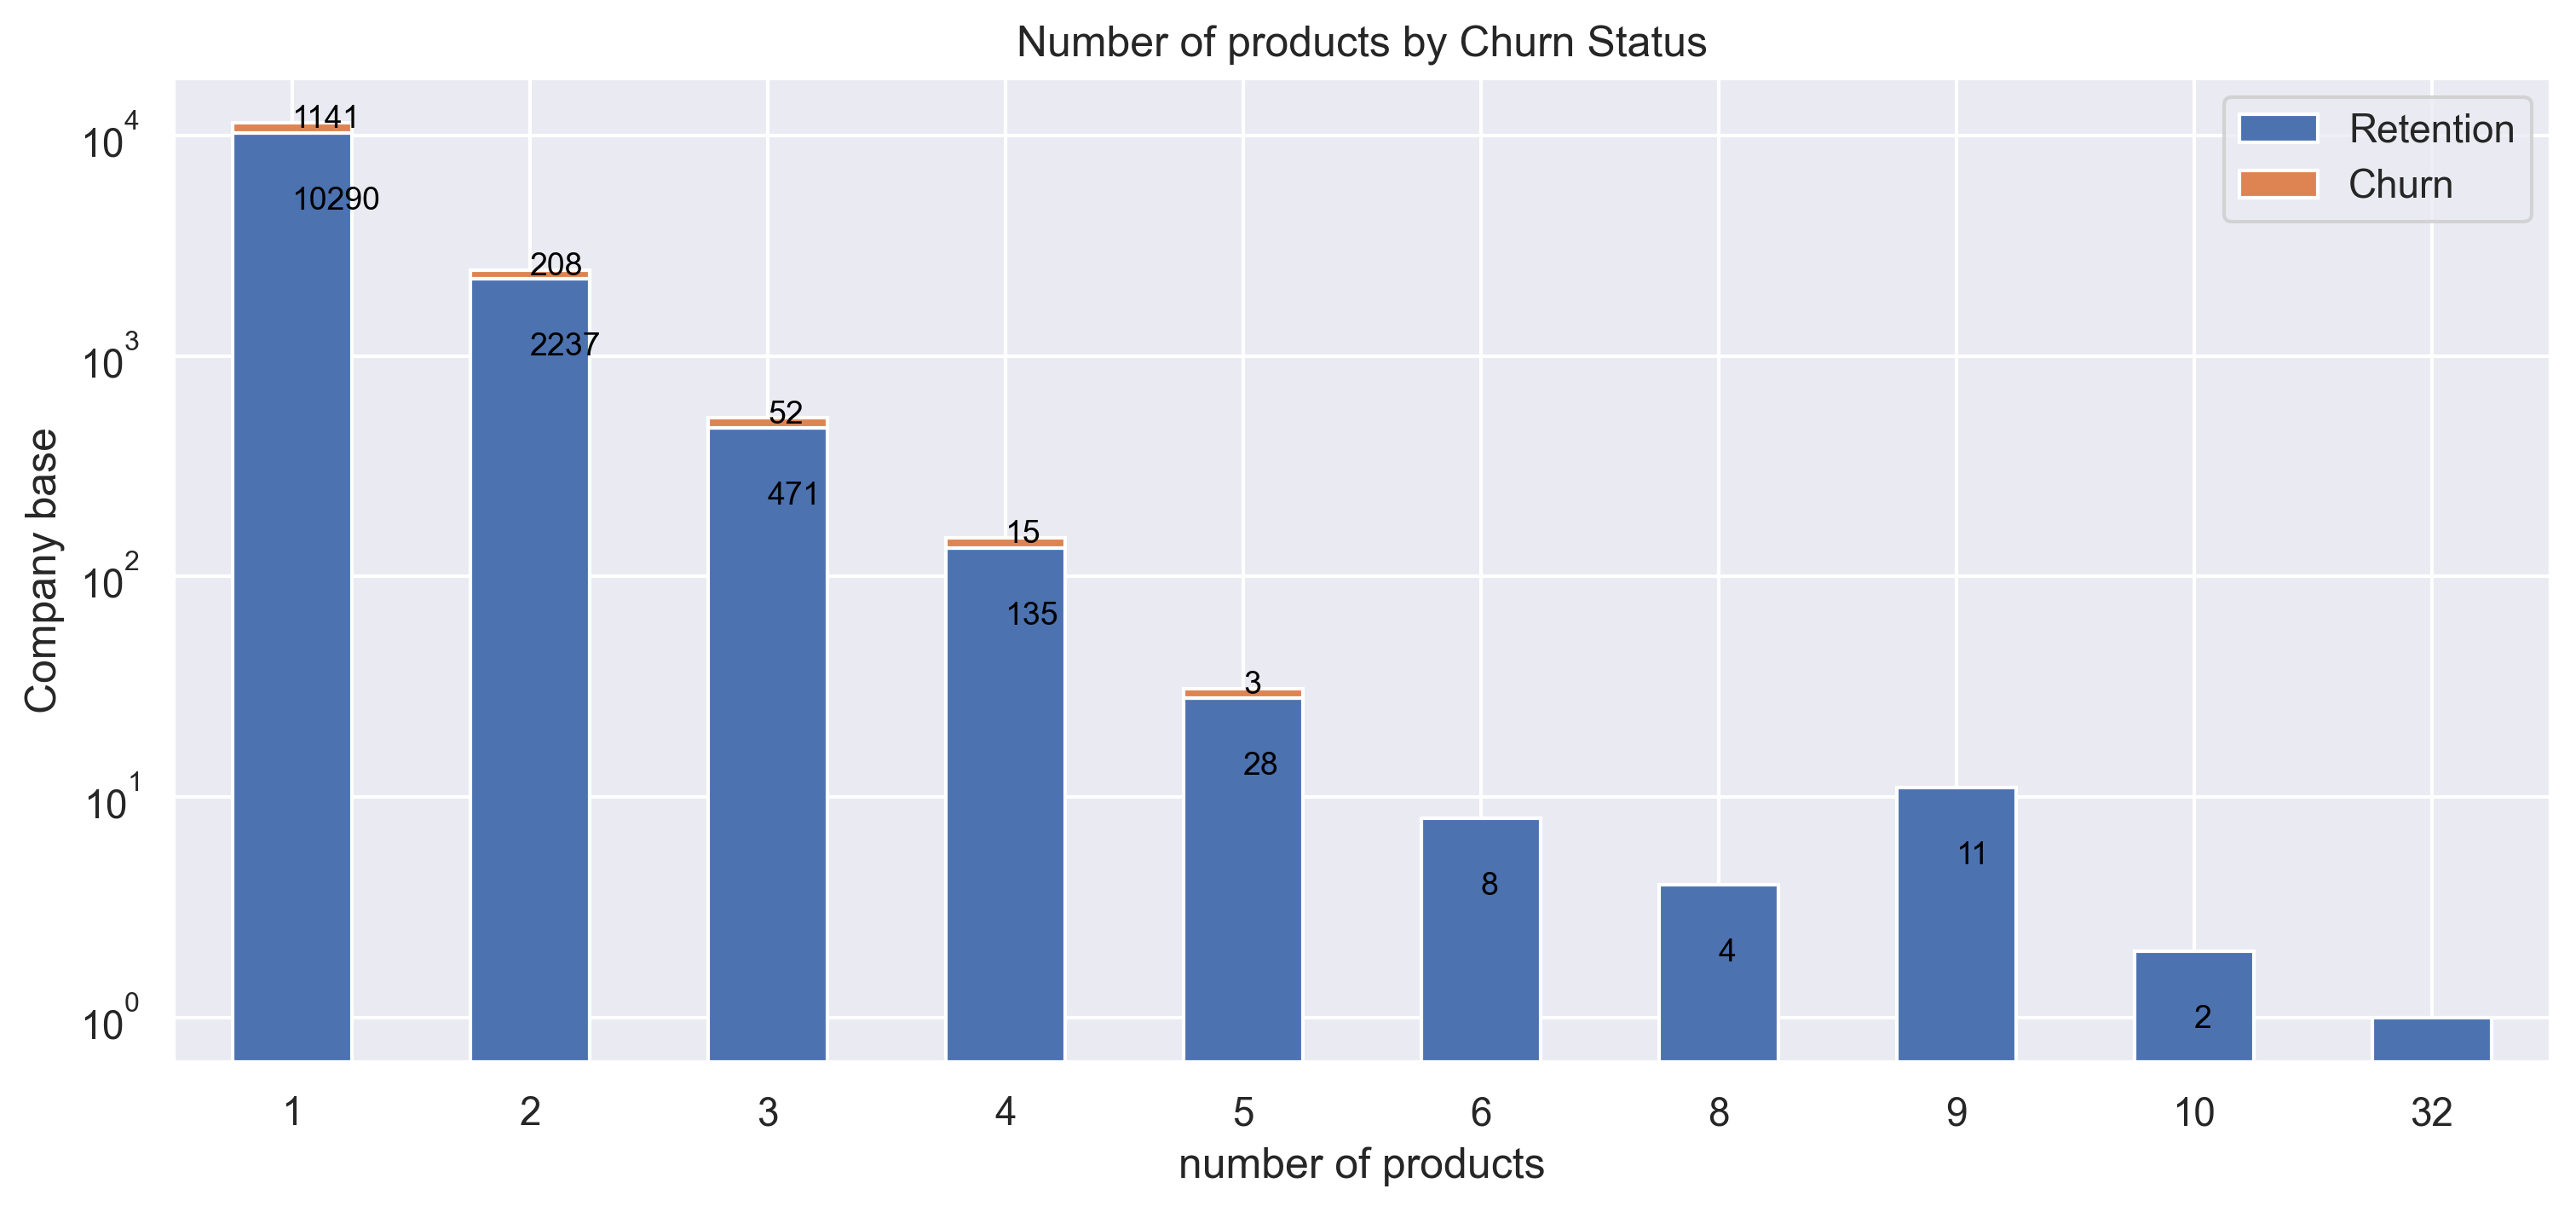

In [29]:
others=client_df[['id','nb_prod_act','num_years_antig','origin_up','churn']]
products=others.groupby([others['nb_prod_act'],others['churn']])['id'].count().unstack(level=1)
products_percentage=(products.div(products.sum(axis=1),axis=0)*100).sort_index()
ax=products.plot(kind='bar',stacked=True,figsize=(12,5),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value[:-2],((p.get_x()+p.get_width()/2),p.get_y()+p.get_height()/2*0.9),
               color='black',size=(9))
ax.set_yscale('log')
plt.gcf().set_dpi(300)
plt.xlabel('number of products')
plt.title('Number of products by Churn Status')
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base");

**Insights**
- **78%** of customers are benefitting of 1 product of PowerCo.
- **99.8%** have at most 5 active products at a time.
- SME that churned have less than 5 active products with the company.

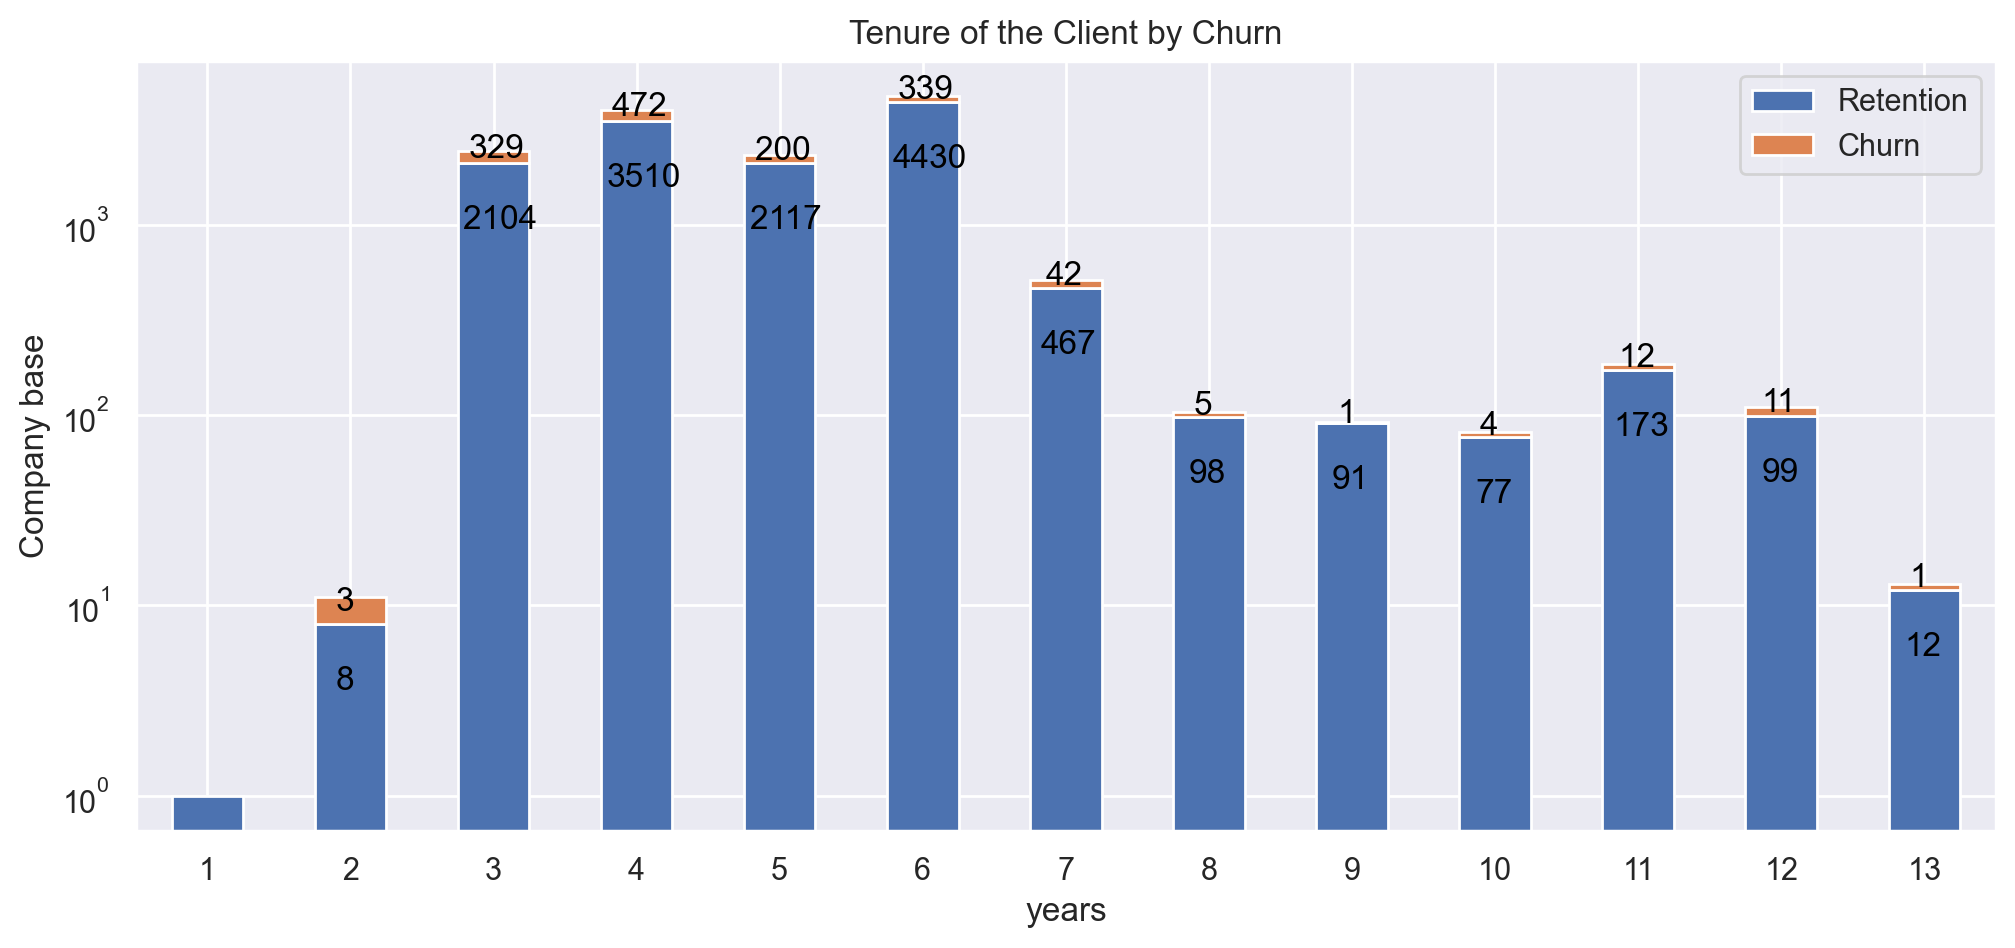

In [30]:
years_antig=others.groupby([others['num_years_antig'],others['churn']])['id'].count().unstack(level=1)
ax=years_antig.plot(kind='bar',stacked=True,figsize=(12,5),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value[:-2],((p.get_x()+p.get_width()/2)-0.035*len(value),p.get_y()+p.get_height()/2*0.9),
               color='black',size=(12))
ax.set_yscale('log')
plt.gcf().set_dpi(200)
plt.xlabel('years')
plt.title('Tenure of the Client by Churn')
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base");

> **Antiquity of the client:** refers to the length of time that a client has been doing business with a company. It can be used to describe the historical relationship between the client and the company, including the frequency and duration of transactions, as well as the level of loyalty and trust that has developed over time.

**Insights**
- **94.4%** of SME clients who churned have been with the company between **3** to **6** years.
- A concerning number of **28** SME have churned after being clients for PowerCo for more than **10** years.

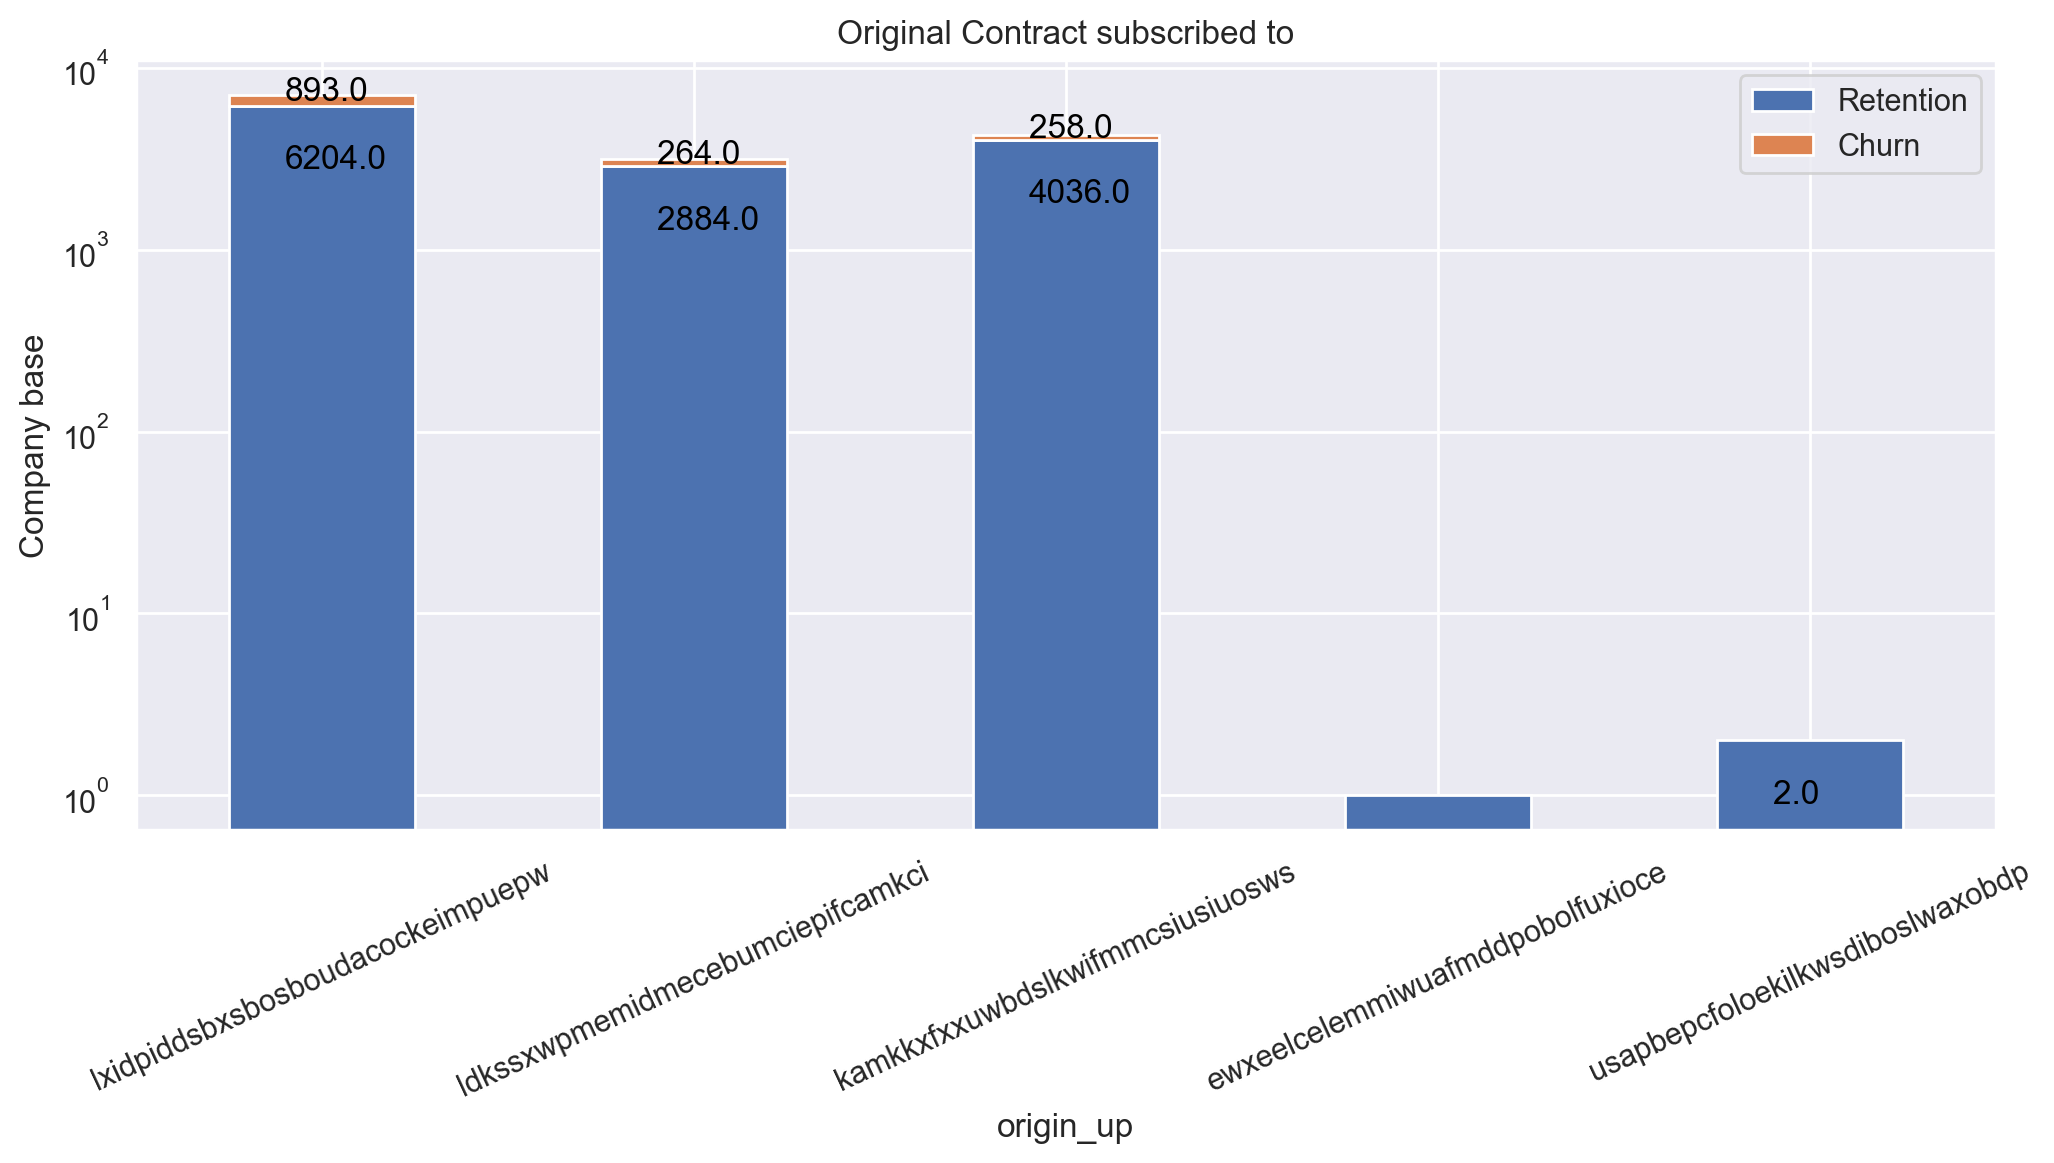

In [31]:
origin_up=client_df.groupby([client_df['origin_up'],client_df['churn']])['id'].count().unstack(level=1)
origin_up.sort_values(1, ascending=False, inplace=True)
ax=origin_up.plot(kind='bar',stacked=True,figsize=(12,5),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)-0.1,p.get_y()+p.get_height()/2*0.9),
               color='black',size=(12))
ax.set_yscale('log')
plt.gcf().set_dpi(200)
plt.title('Original Contract subscribed to')
plt.legend(['Retention','Churn'],loc="upper right")
plt.xticks(rotation=25)
plt.ylabel("Company base");


**Insights**
- Churn is happening in 3 offers only but we can't take that into account since the other 2 offers aren't widely used (only 3 clients).
- `lxidpiddsbxsbosboudacockeimpuepw` plan has the highest churn probability of **14.4%**.

In [32]:

price_df.sort_values('price_date', inplace=True)
grouped_df = price_df.groupby('id')
first_half = grouped_df.head(6).groupby('id').mean()
first_half.columns = ['first_'+column for column in first_half.columns]
last_half = grouped_df.tail(6).groupby('id').mean()
last_half.columns = ['last_'+column for column in last_half.columns]

In [33]:
result_df = pd.concat([first_half, last_half], axis=1)
result_df.reset_index(inplace=True)
result_df = pd.merge(result_df, client_df[['id','churn']], on="id")
result_df

,id,first_price_date,first_price_off_peak_var,first_price_peak_var,first_price_mid_peak_var,first_price_off_peak_fix,first_price_peak_fix,first_price_mid_peak_fix,last_price_date,last_price_off_peak_var,last_price_peak_var,last_price_mid_peak_var,last_price_off_peak_fix,last_price_peak_fix,last_price_mid_peak_fix,churn
0,0002203ffbb812588b632b9e628cc38d,2015-03-17 04:00:00,0.127411,0.105220,0.072593,40.674580,24.404747,16.269833,2015-09-15 20:00:00,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,0
1,0004351ebdd665e6ee664792efc4fd13,2015-03-17 04:00:00,0.148166,0.000000,0.000000,44.326191,0.000000,0.000000,2015-09-15 20:00:00,0.144687,0.000000,0.000000,44.444710,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-03-17 04:00:00,0.161093,0.000000,0.000000,44.694710,0.000000,0.000000,2015-09-15 20:00:00,0.202024,0.000000,0.000000,45.944710,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,2015-03-17 04:00:00,0.149668,0.000000,0.000000,44.266931,0.000000,0.000000,2015-09-15 20:00:00,0.146184,0.000000,0.000000,44.266930,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,2015-03-17 04:00:00,0.129145,0.106976,0.074372,40.728885,24.437330,16.291555,2015-09-15 20:00:00,0.123007,0.104108,0.075469,40.728885,24.437330,16.291555,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,ffebf6a979dd0b17a41076df1057e733,2015-03-17 04:00:00,0.126409,0.104273,0.072331,40.565970,24.339580,16.226388,2015-09-15 20:00:00,0.118442,0.100477,0.072089,40.647429,24.388454,16.258969,0
14602,fffac626da707b1b5ab11e8431a4d0a2,2015-03-17 04:00:00,0.148825,0.000000,0.000000,44.266931,0.000000,0.000000,2015-09-15 20:00:00,0.145449,0.000000,0.000000,44.355820,0.000000,0.000000,0
14603,fffc0cacd305dd51f316424bbb08d1bd,2015-03-17 04:00:00,0.154998,0.131427,0.098280,41.091456,24.854206,16.735583,2015-09-15 20:00:00,0.152759,0.127566,0.091403,41.228885,24.937330,16.791555,0
14604,fffe4f5646aa39c7f97f95ae2679ce64,2015-03-17 04:00:00,0.127566,0.105428,0.073487,40.565970,24.339580,16.226388,2015-09-15 20:00:00,0.120150,0.101570,0.073983,40.647429,24.388454,16.258969,0


In [34]:
result_df

,id,first_price_date,first_price_off_peak_var,first_price_peak_var,first_price_mid_peak_var,first_price_off_peak_fix,first_price_peak_fix,first_price_mid_peak_fix,last_price_date,last_price_off_peak_var,last_price_peak_var,last_price_mid_peak_var,last_price_off_peak_fix,last_price_peak_fix,last_price_mid_peak_fix,churn
0,0002203ffbb812588b632b9e628cc38d,2015-03-17 04:00:00,0.127411,0.105220,0.072593,40.674580,24.404747,16.269833,2015-09-15 20:00:00,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,0
1,0004351ebdd665e6ee664792efc4fd13,2015-03-17 04:00:00,0.148166,0.000000,0.000000,44.326191,0.000000,0.000000,2015-09-15 20:00:00,0.144687,0.000000,0.000000,44.444710,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-03-17 04:00:00,0.161093,0.000000,0.000000,44.694710,0.000000,0.000000,2015-09-15 20:00:00,0.202024,0.000000,0.000000,45.944710,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,2015-03-17 04:00:00,0.149668,0.000000,0.000000,44.266931,0.000000,0.000000,2015-09-15 20:00:00,0.146184,0.000000,0.000000,44.266930,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,2015-03-17 04:00:00,0.129145,0.106976,0.074372,40.728885,24.437330,16.291555,2015-09-15 20:00:00,0.123007,0.104108,0.075469,40.728885,24.437330,16.291555,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,ffebf6a979dd0b17a41076df1057e733,2015-03-17 04:00:00,0.126409,0.104273,0.072331,40.565970,24.339580,16.226388,2015-09-15 20:00:00,0.118442,0.100477,0.072089,40.647429,24.388454,16.258969,0
14602,fffac626da707b1b5ab11e8431a4d0a2,2015-03-17 04:00:00,0.148825,0.000000,0.000000,44.266931,0.000000,0.000000,2015-09-15 20:00:00,0.145449,0.000000,0.000000,44.355820,0.000000,0.000000,0
14603,fffc0cacd305dd51f316424bbb08d1bd,2015-03-17 04:00:00,0.154998,0.131427,0.098280,41.091456,24.854206,16.735583,2015-09-15 20:00:00,0.152759,0.127566,0.091403,41.228885,24.937330,16.791555,0
14604,fffe4f5646aa39c7f97f95ae2679ce64,2015-03-17 04:00:00,0.127566,0.105428,0.073487,40.565970,24.339580,16.226388,2015-09-15 20:00:00,0.120150,0.101570,0.073983,40.647429,24.388454,16.258969,0


In [36]:
means = result_df.groupby('churn').mean(numeric_only=True).reset_index()

In [37]:
means

,churn,first_price_off_peak_var,first_price_peak_var,first_price_mid_peak_var,first_price_off_peak_fix,first_price_peak_fix,first_price_mid_peak_fix,last_price_off_peak_var,last_price_peak_var,last_price_mid_peak_var,last_price_off_peak_fix,last_price_peak_fix,last_price_mid_peak_fix
0,0,0.144467,0.052156,0.027533,42.849776,9.267639,5.979476,0.140284,0.051004,0.027927,42.957777,9.281092,5.987646
1,1,0.144096,0.057301,0.033143,43.103368,11.191712,7.154866,0.139681,0.055834,0.033573,43.220660,11.203630,7.166263


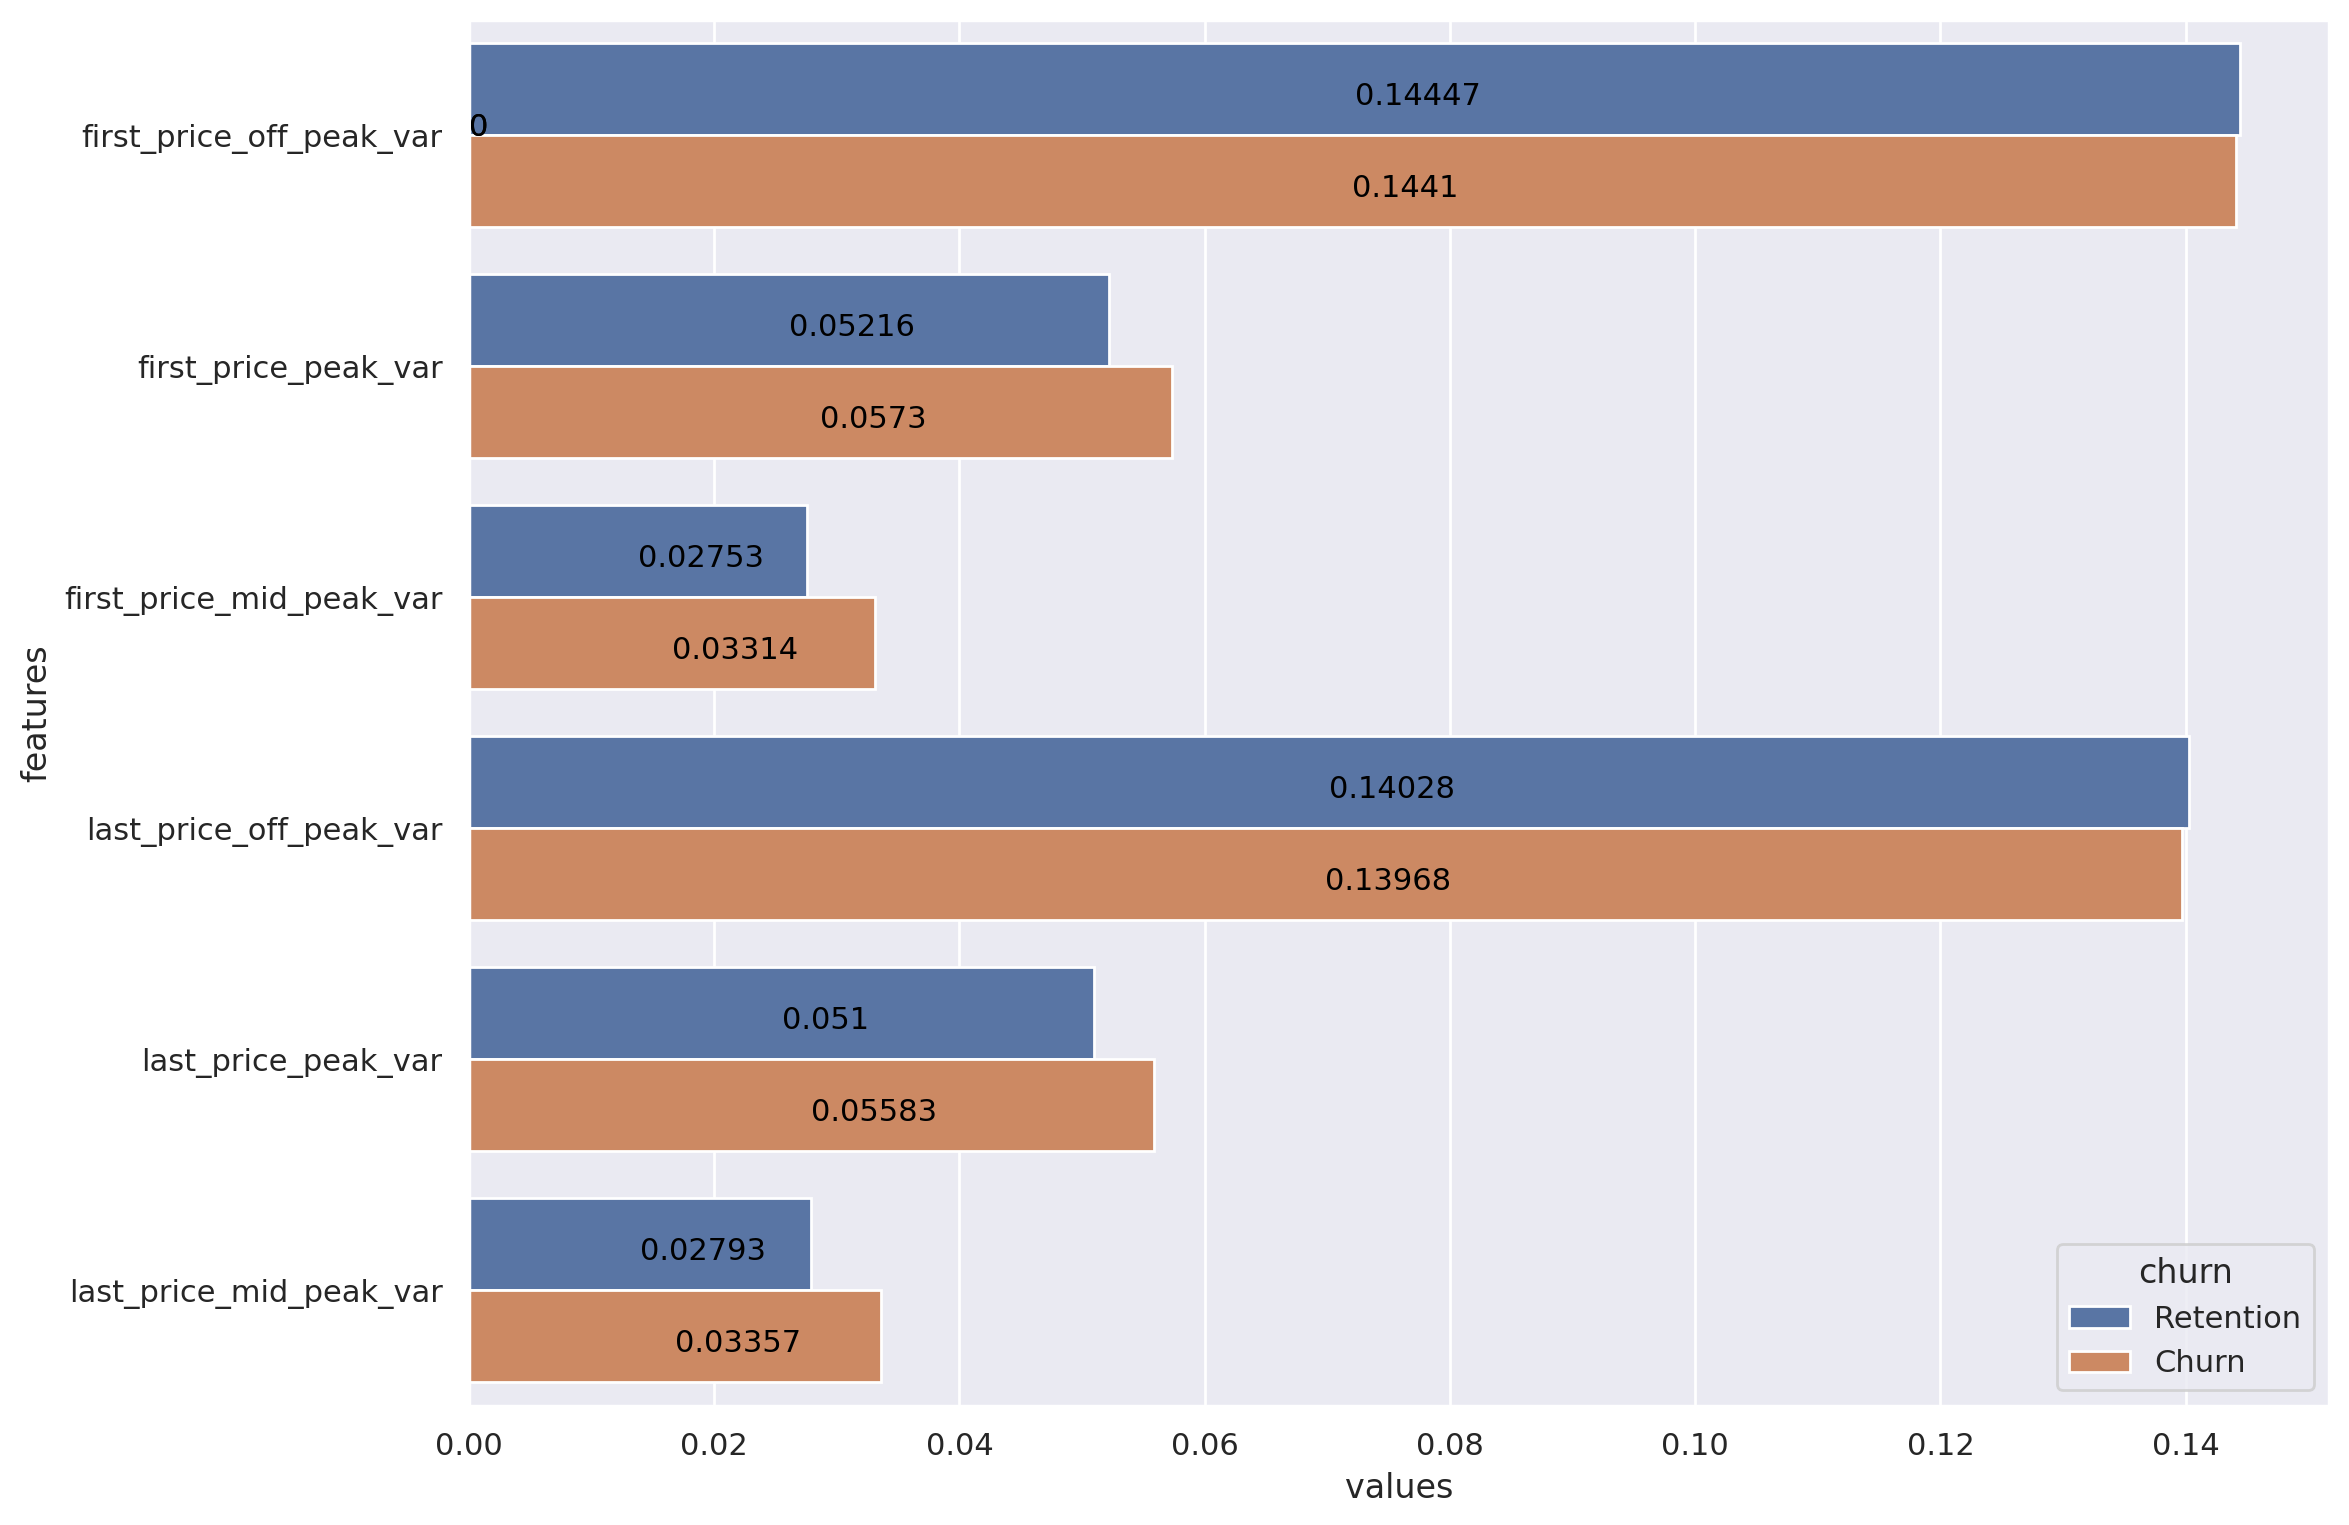

In [38]:
melted_df = pd.melt(means[['churn', 'first_price_off_peak_var', 'first_price_peak_var', 'first_price_mid_peak_var',
                          'last_price_off_peak_var', 'last_price_peak_var', 'last_price_mid_peak_var']], 
                    id_vars=['churn'], var_name='features', value_name='values')
melted_df['churn'] = melted_df['churn'].replace({0: 'Retention', 1: 'Churn'})
# create the bar plot
plt.figure(figsize=(12,9), dpi=200)
sns.barplot(data=melted_df, y='features', x='values', hue='churn')
ax = plt.gca()
for p in ax.patches:
    value=str(round(p.get_width(),5))
    ax.annotate(value,((p.get_x()+p.get_width()/2),p.get_y()+p.get_height()/1.5),
               color='black',size=(11))
plt.style.use('classic')
plt.show()

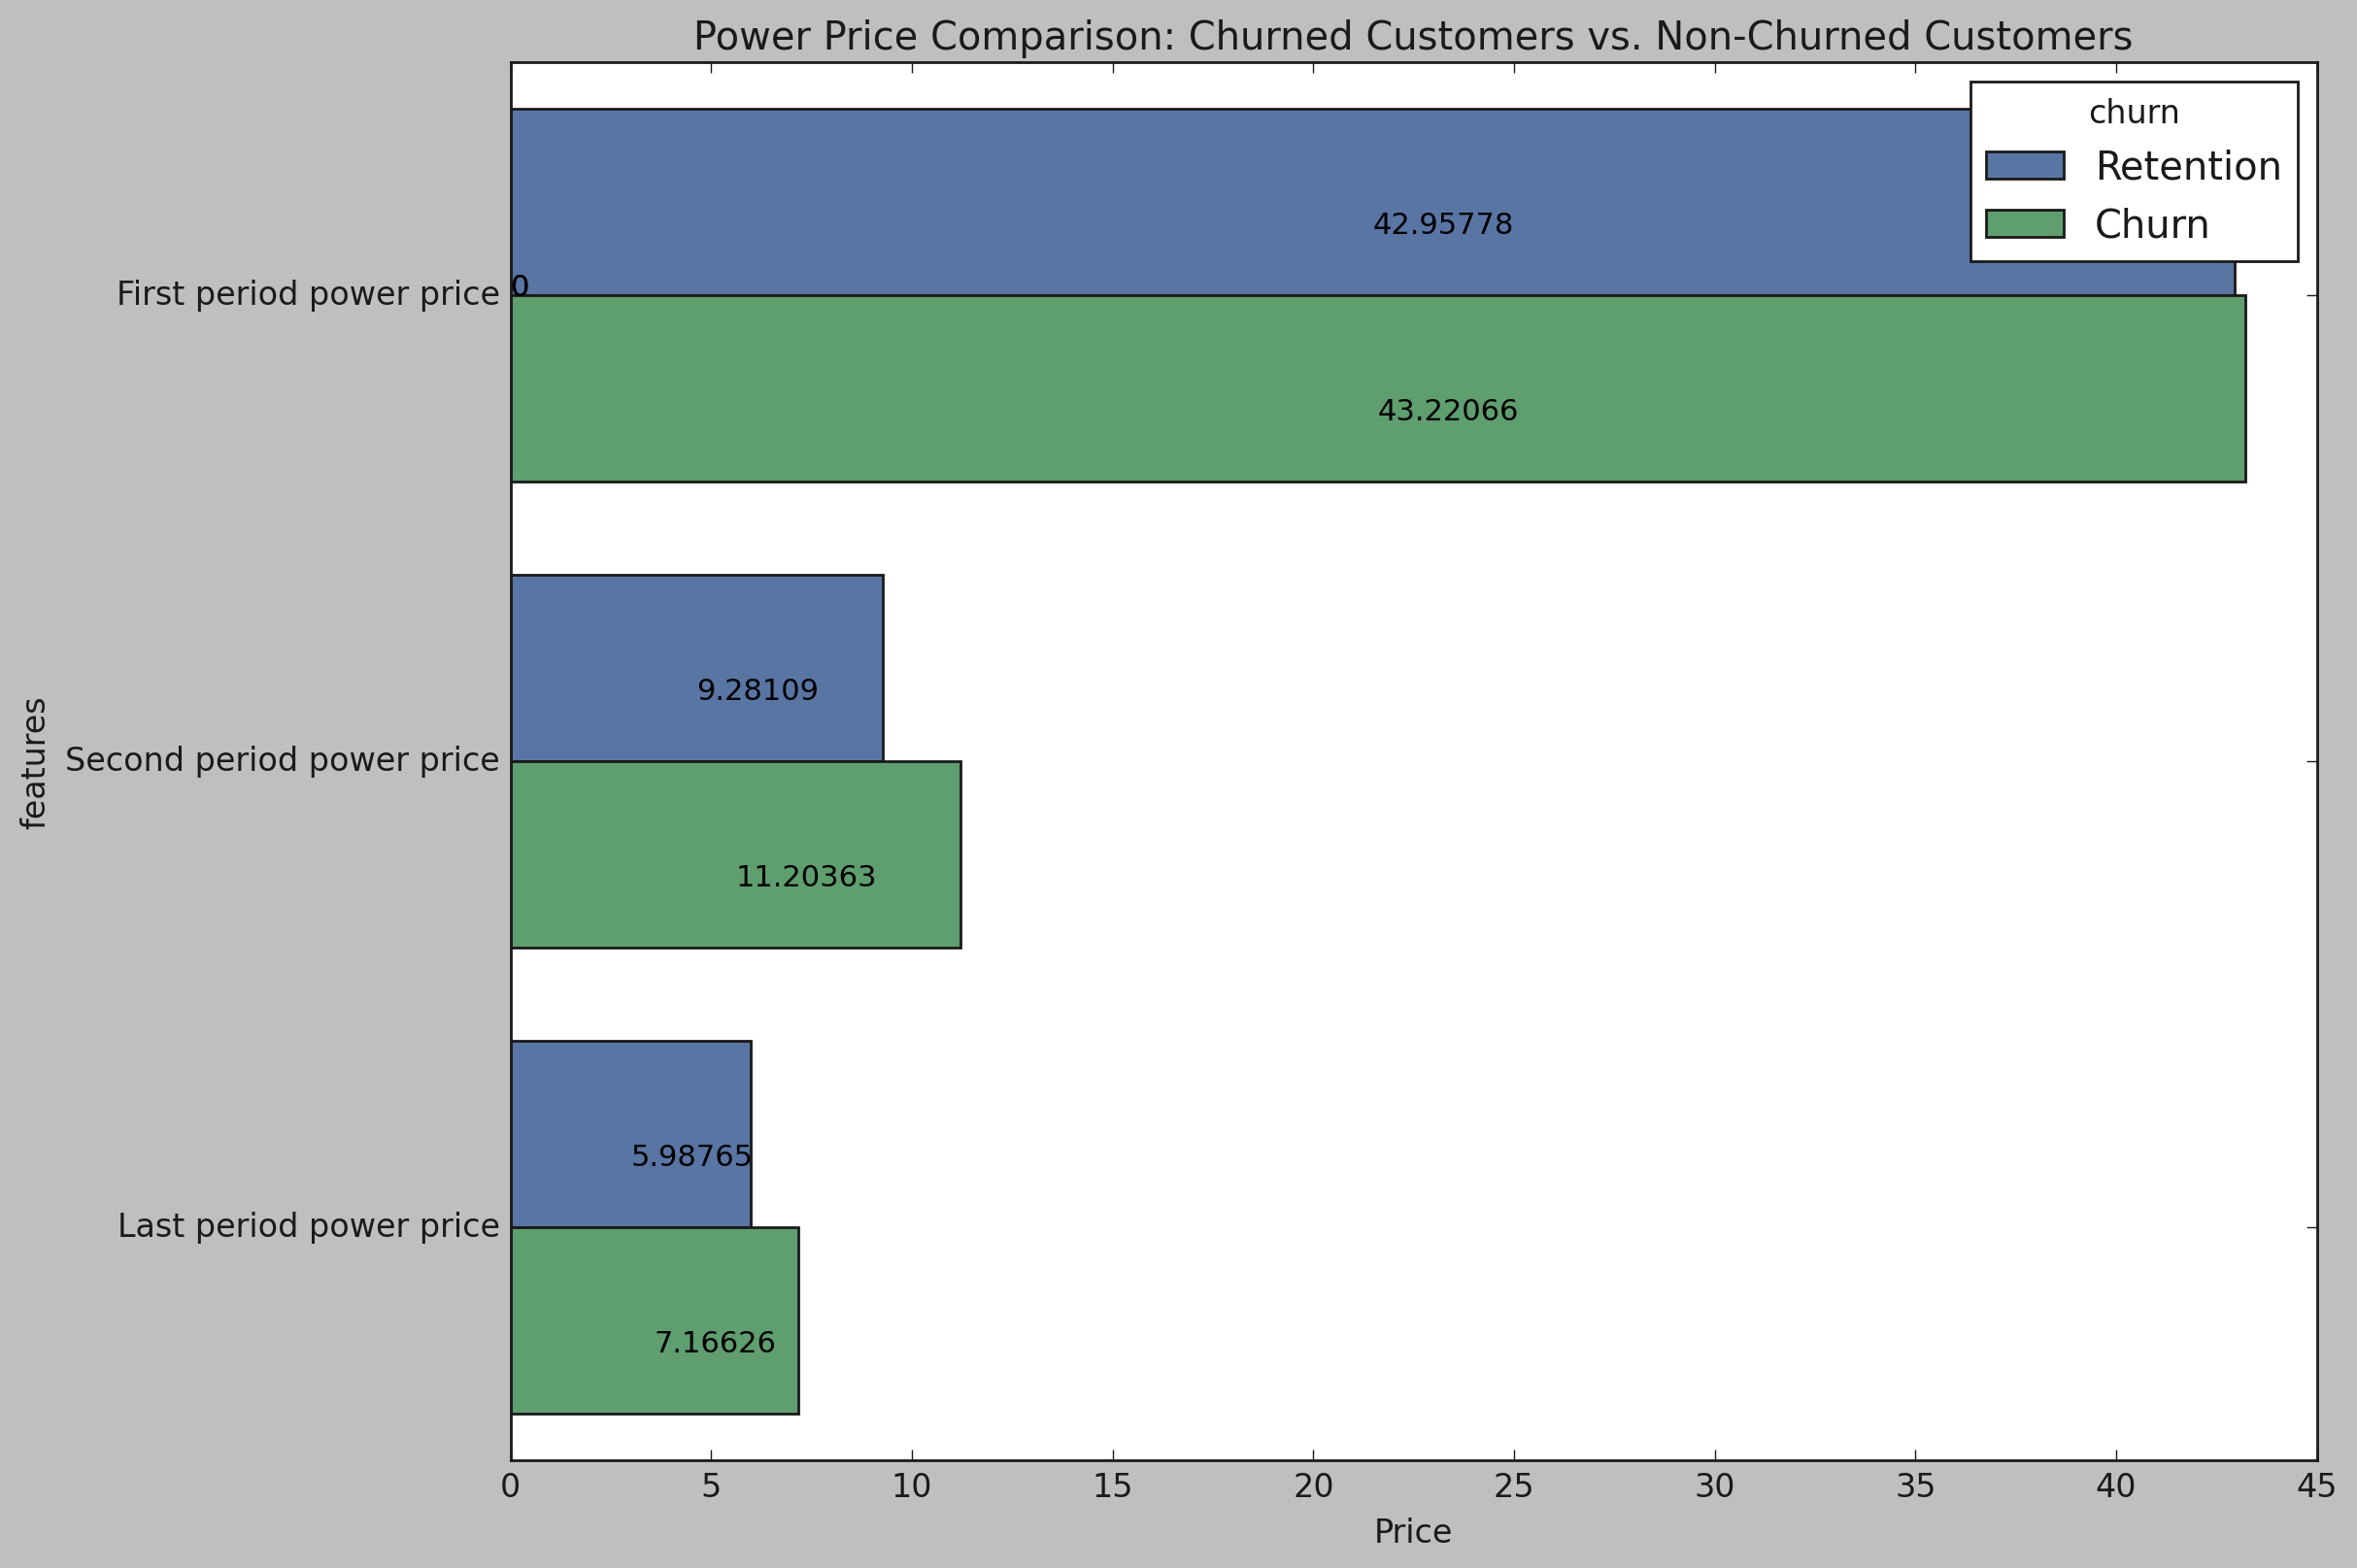

In [39]:

melted_df = pd.melt(means[['churn', 'first_price_off_peak_fix', 'first_price_peak_fix', 'first_price_mid_peak_fix',
                          'last_price_off_peak_fix', 'last_price_peak_fix', 'last_price_mid_peak_fix']], 
                    id_vars=['churn'], var_name='features', value_name='value')
melted_df['churn'] = melted_df['churn'].replace({0: 'Retention', 1: 'Churn'})

melted_df = melted_df[(melted_df['features'] == 'last_price_off_peak_fix') | (melted_df['features'] =='last_price_peak_fix') | (melted_df['features'] =='last_price_mid_peak_fix')]
# create the bar plot
plt.figure(figsize=(12,9), dpi=200)
sns.barplot(data=melted_df, y='features', x='value', hue='churn')
#plt.xscale('log')
plt.xlabel('Price')
plt.title('Power Price Comparison: Churned Customers vs. Non-Churned Customers')
ax = plt.gca()
ax.set_yticks([0, 1, 2])  # Set ticks matching your number of labels
ax.set_yticklabels(['First period power price', 'Second period power price', 'Last period power price'])
for p in ax.patches:
    value=str(round(p.get_width(),5))
    ax.annotate(value,((p.get_x()+p.get_width()/2),p.get_y()+p.get_height()/1.5),
               color='black',size=(11))
    plt.style.use('classic')
plt.show()

In [42]:
result_df = price_df.groupby('id').mean().reset_index()
result_df = pd.merge(client_df, result_df, on='id')

**Insights**
- The above two barplots show that churned SME tend to pay more than those who are still customers. Which suggests that the pricing strategy is the reason of churn.
- There is an increase in price for all companies due to the increased cost of energy.

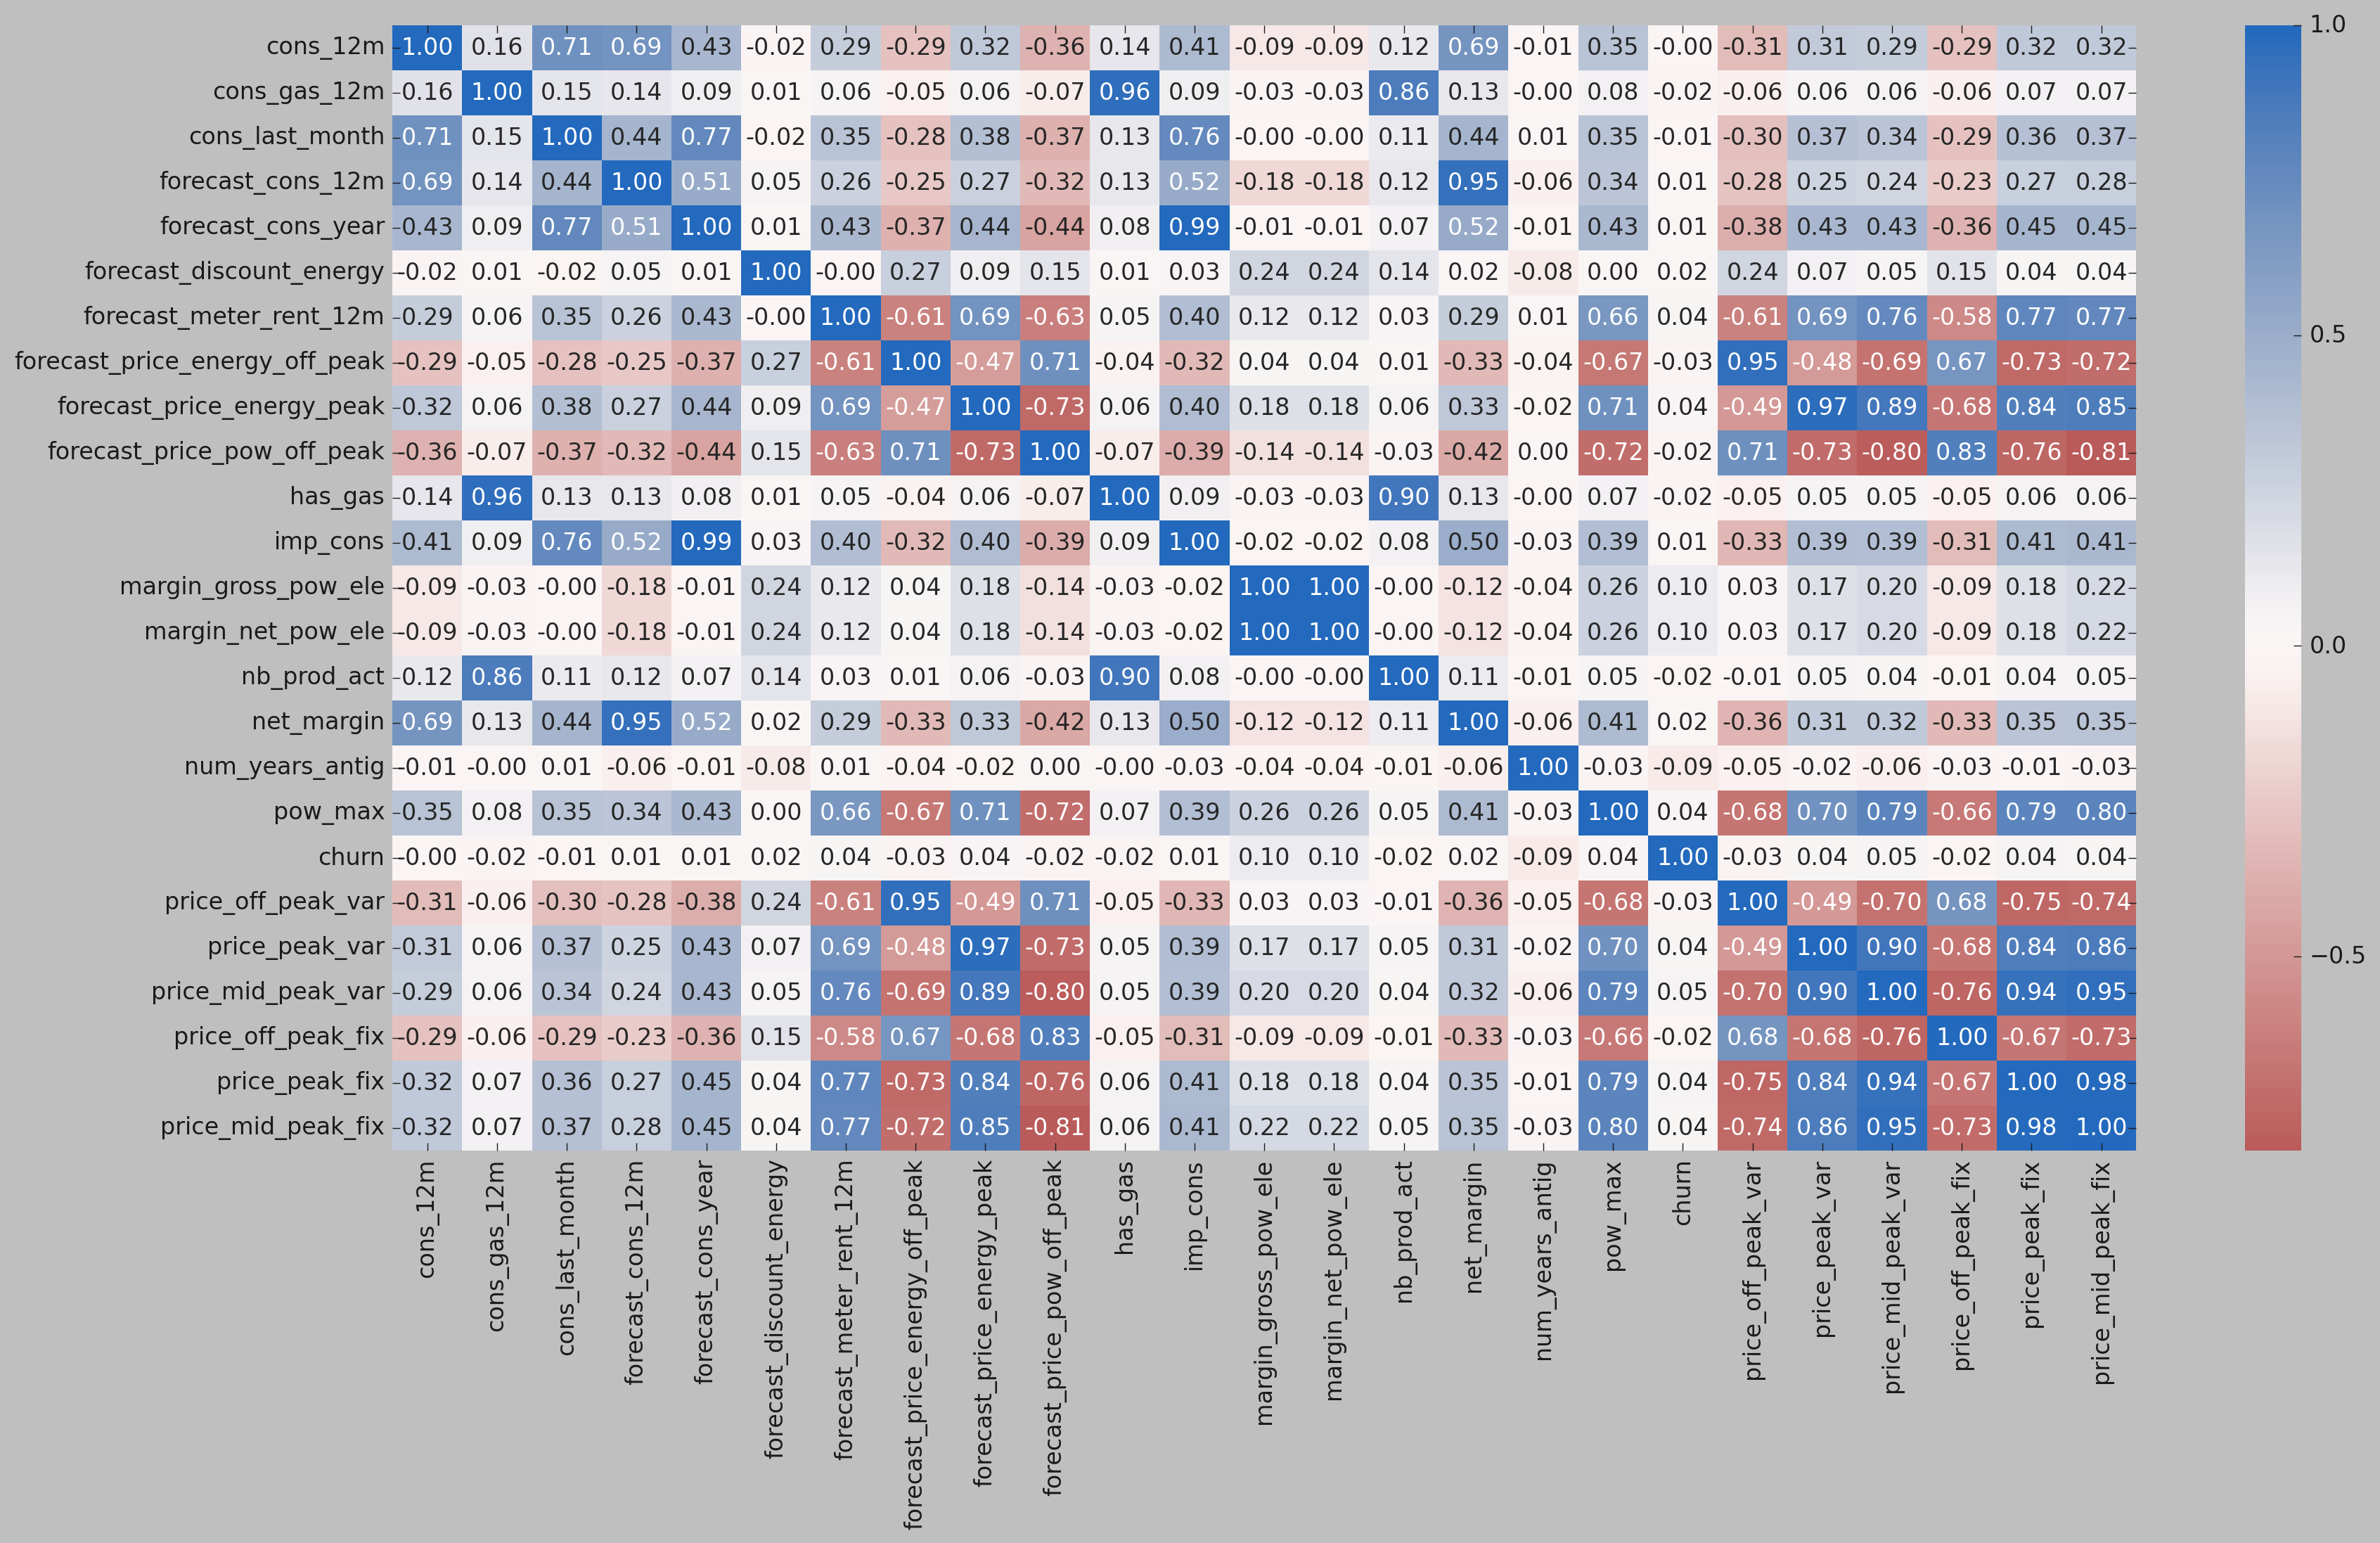

In [44]:
# Select only numeric columns from result_df
numeric_df = result_df.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numeric columns only
corr_df = numeric_df.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(20, 10), dpi=200)
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='vlag_r', center=0)
plt.show()

The above correlation matrix shows Spearman rank correlation matrix.
> The Spearman rank correlation coefficient (also known as Spearman's rho) is a measure of the ordinal correlation between two variables, it is based on the rank order of the data rather than the actual values. It ranges from -1 to 1, with 0 indicating no correlation, 1 indicating a perfect positive correlation, and -1 indicating a perfect negative correlation. Spearman's rho does not assume that the relationship between the two variables is linear or that they are normally distributed. It is particularly useful when dealing with skewed data or outliers.

---
## Hypothesis Testing
To test whether the relationship between price and churn is a statistically significant.
> Statistical significance is a term used in statistical hypothesis testing to describe the likelihood that an observed effect or difference between groups is real and not simply due to chance.

We start by stating the null hypothesis and alternative hypothesis:

**Null hypothesis:** there is no significant difference between the mean of price of the two groups (churn/retention).

**Alternative hypothesis:** there is a significant difference between the mean of price of the two groups (churn/retention).

> The significance level is set to 0.05.<br> 
Any p-value below the significance will cause the rejection of the null hypothesis. otherwise we fail to reject the null hypothesis.

First, we will use t-test and find the p-value

In [45]:
hypothesis_df = pd.merge(price_df.groupby('id').mean(), client_df[['id','churn']], on="id")

In [46]:
columns = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
           'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
for column in columns:
    ttest_result = ttest_ind(hypothesis_df[hypothesis_df['churn']==0][column],
                             hypothesis_df[hypothesis_df['churn']==1][column], 
                             equal_var=False)
    print(column)
    print(ttest_result)
    print("------------------------")

price_off_peak_var
TtestResult(statistic=0.8211123599141759, pvalue=0.41169173776073953, df=1787.9421954551278)
------------------------
price_peak_var
TtestResult(statistic=-3.5426368995008812, pvalue=0.0004066588047157523, df=1729.49546852865)
------------------------
price_mid_peak_var
TtestResult(statistic=-5.492976113937087, pvalue=4.544122703842065e-08, df=1717.587331911206)
------------------------
price_off_peak_fix
TtestResult(statistic=-2.773806423387593, pvalue=0.005588180822944836, df=2155.9871854468606)
------------------------
price_peak_fix
TtestResult(statistic=-5.5630042315334345, pvalue=3.070692292051358e-08, df=1715.877945724814)
------------------------
price_mid_peak_fix
TtestResult(statistic=-5.313028093578065, pvalue=1.2187439227124392e-07, df=1720.7243538215323)
------------------------


In [47]:
def hypothesis_test(df, columns):
    # Split the data into two separate groups
    churn = df[df['churn'] == 1]
    ret = df[df['churn'] == 0]
    fig, ax = plt.subplots(3, 2, figsize=(13,11), dpi=200)
    i = 0
    for index, column in enumerate(columns):
        # Calculate the means and standard deviations of each group
        churn_mean = churn[column].mean()
        churn_std = churn[column].std()
        ret_mean = ret[column].mean()
        ret_std = ret[column].std()

        # Define a function to generate bootstrap samples
        def bootstrap(data):
            return np.random.choice(data, size=len(data), replace=True)

        # Generate 10,000 bootstrap samples of the data
        churn_bootstrap_means = [bootstrap(churn[column]).mean() for i in range(10000)]
        ret_bootstrap_means = [bootstrap(ret[column]).mean() for i in range(10000)]

        # Calculate the difference between the means of the two groups
        mean_diff = churn_mean - ret_mean

        # Calculate the p-value by comparing the observed difference to the distribution of differences from the bootstrap samples
        null_diff = np.array(churn_bootstrap_means) - np.array(ret_bootstrap_means)
        p_value = (null_diff <= 0).mean()

        # Print the results
        print(column)
        print(f"Bootstrap p-value: {p_value}")

        CI = np.percentile(null_diff, [2.5,97.5])
        print(f"CI: {CI}")
        print("------------------------")
        if index == 3:
            i += 1
        ax[index%3, i].hist(null_diff, bins=40, alpha=1)
        ax[index%3, i].axvline(np.percentile(null_diff,2.5),color = 'red',linewidth=2, label='Confidence Interval')
        ax[index%3, i].axvline(np.percentile(null_diff,97.5),color = 'red',linewidth=2)
        ax[index%3, i].axvline(mean_diff,color = 'black',linewidth=2, label='Mean Difference')
        ax[index%3, i].axvline(0,color = 'green',linewidth=2, label = 'Zero')
        ax[index%3, i].set_title(column)
        ax[index%3, i].set_ylabel("Frequency")
    handles, labels = ax[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center',bbox_to_anchor=(0.5, 0),
          fancybox=True, shadow=True, ncol=5)
    plt.show()

price_off_peak_var
Bootstrap p-value: 0.7945
CI: [-0.00165459  0.00069925]
------------------------
price_peak_var
Bootstrap p-value: 0.0003
CI: [0.00226191 0.00771943]
------------------------
price_mid_peak_var
Bootstrap p-value: 0.0
CI: [0.00358627 0.00768364]
------------------------
price_off_peak_fix
Bootstrap p-value: 0.0022
CI: [0.08301739 0.44210045]
------------------------
price_peak_fix
Bootstrap p-value: 0.0
CI: [1.24816526 2.60066938]
------------------------
price_mid_peak_fix
Bootstrap p-value: 0.0
CI: [0.7451473 1.6035657]
------------------------


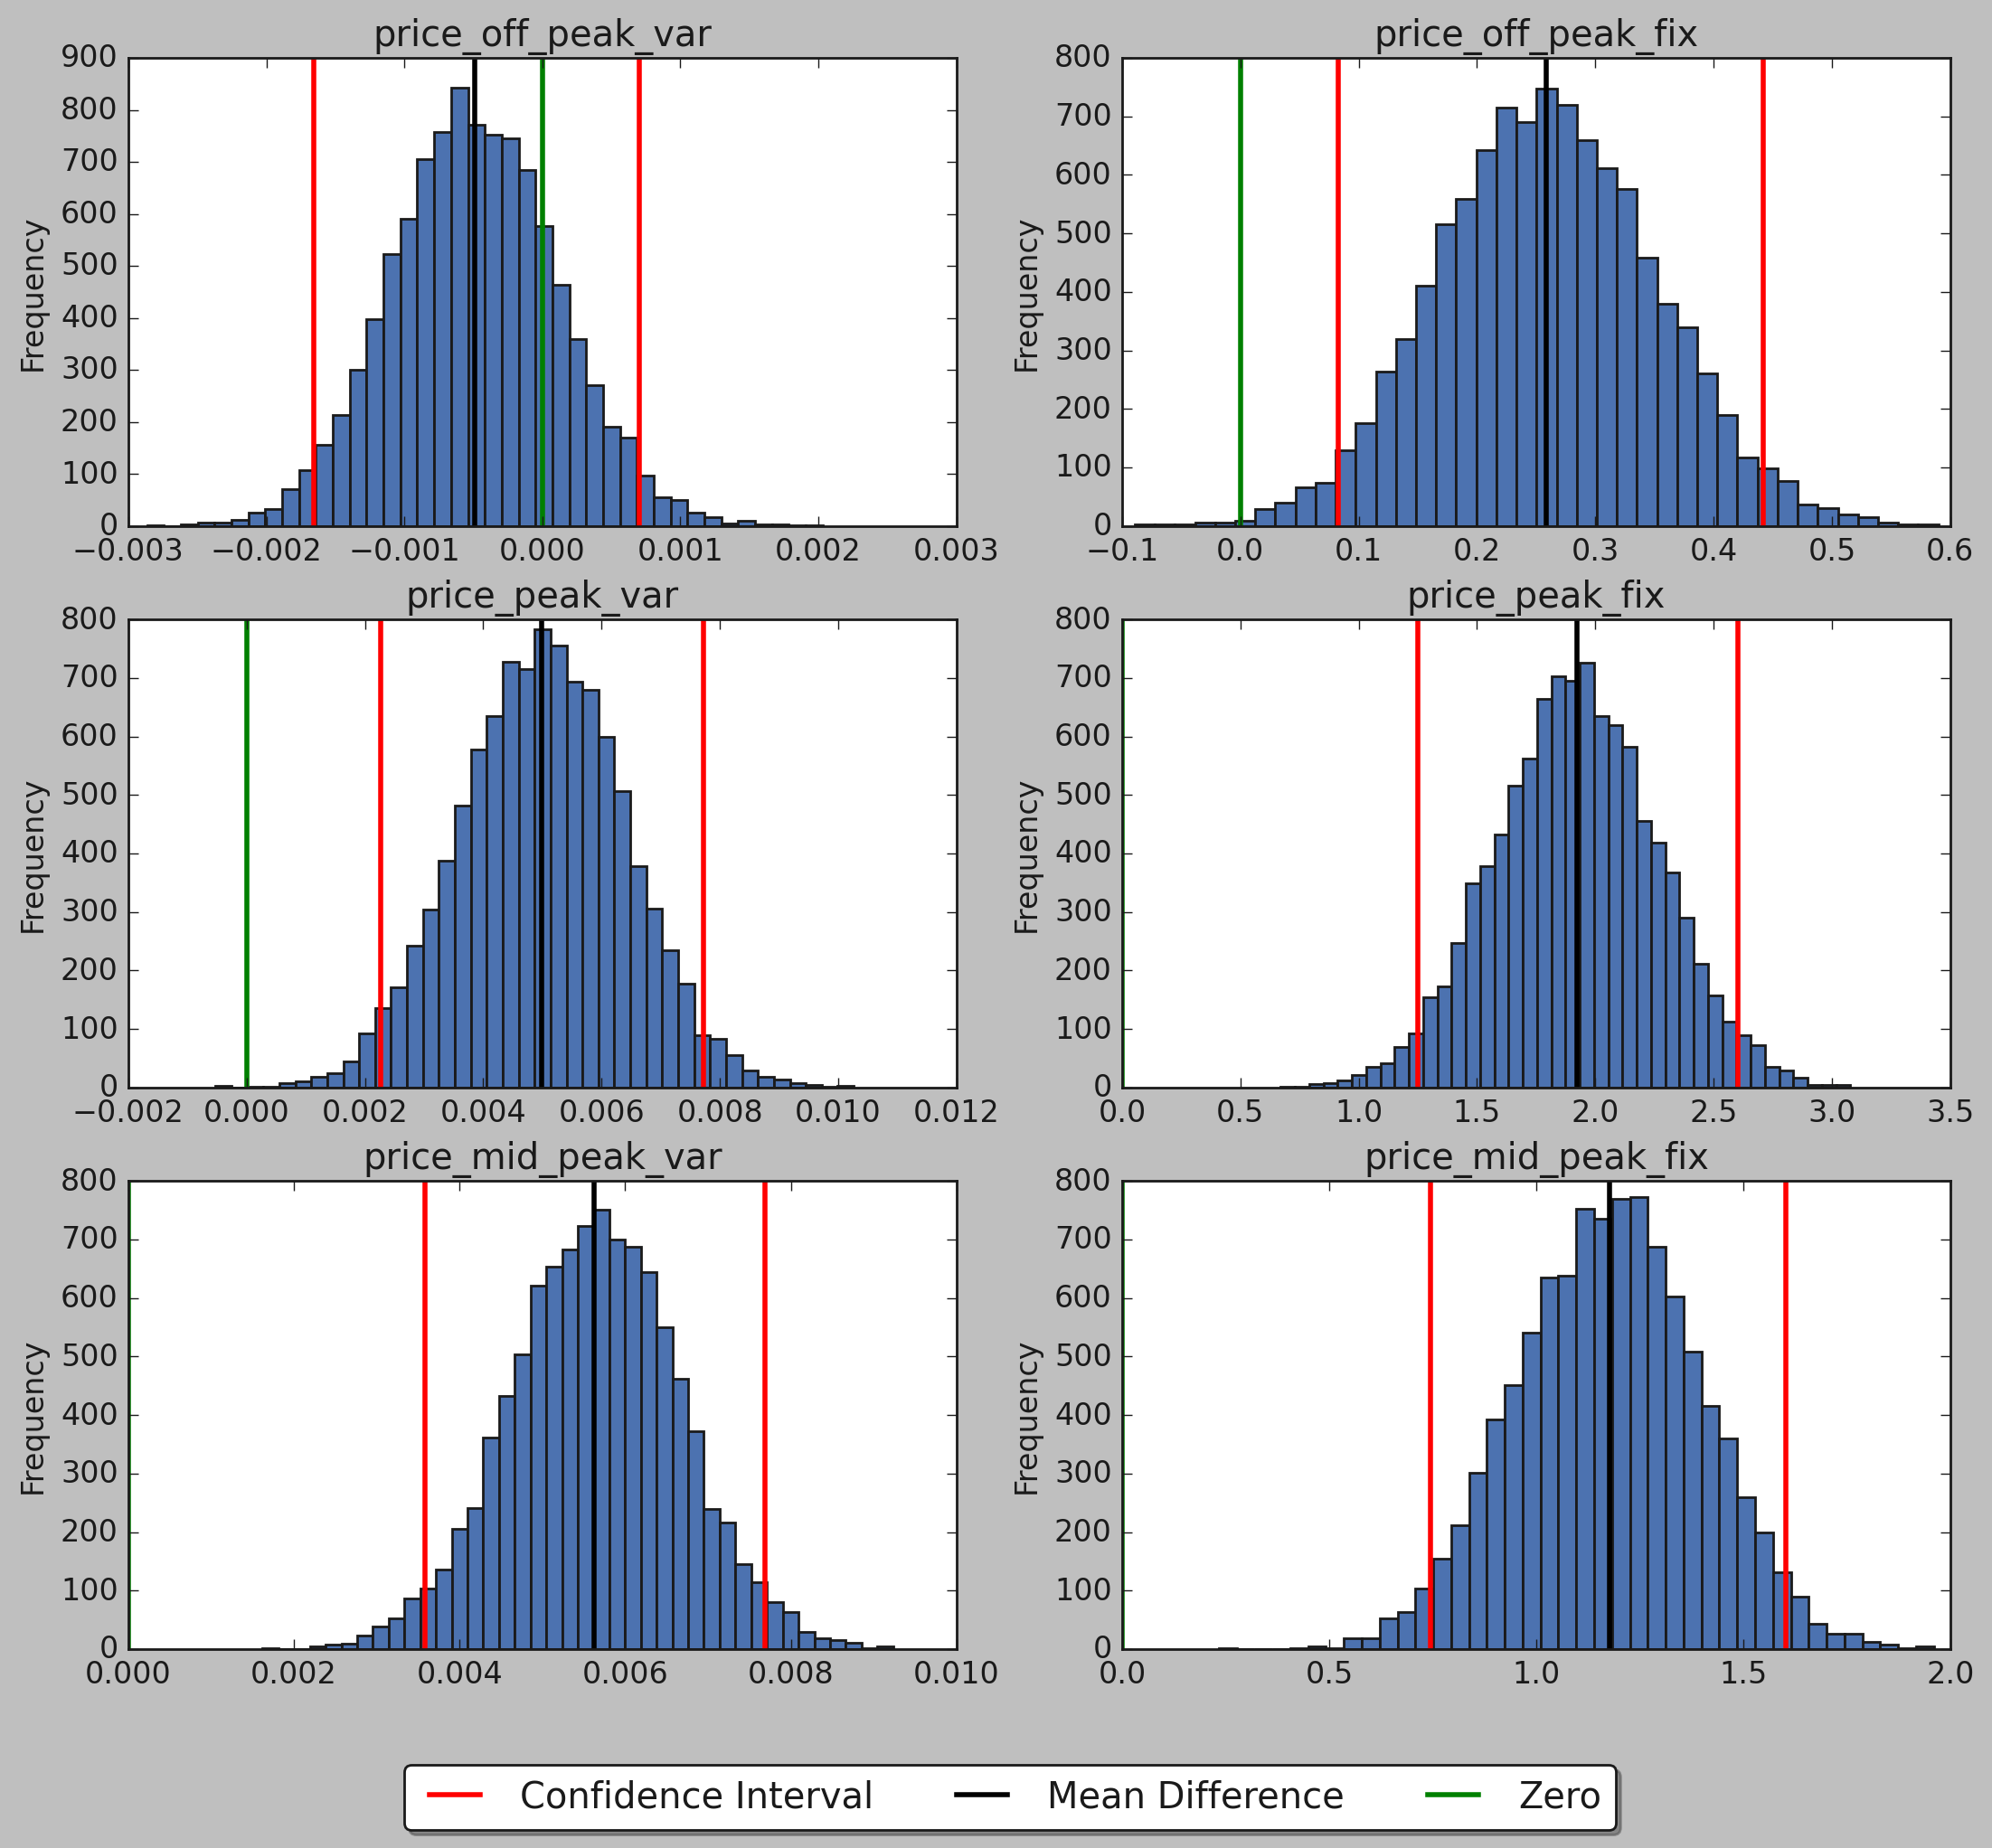

In [48]:
hypothesis_test(hypothesis_df, columns)

### Results
- Both the t-test and Bootstrap gave similar and aggreable results.

The following results are for `price_off_peak_var`:
- The **t-test p-value** is 0.41 and the **bootstrap p-value** is 0.79. Both values are larger than the significance level (> 0.05). Hence, we fail to reject the null hypothesis for `price_off_peak_var` column.

> **Null hypothesis:** there is no significant difference between the mean of price of the two groups (churn/retention).

The following results are for all the other price columns:
- We see that both **bootstrap p-value** and **t-test p-value** for all price features but `price_off_peak_var` are not significant (< 0.05). Which means that we reject the null hypothesis for those columns.
- The Histograms of the distribution of the mean bootstrap differences shows that **95%** of the mean differences are larger than zero which confirms the alternative hypothesis. 

> **Alternative hypothesis:** there is a significant difference between the mean of price of the two groups (churn/retention).
- Furthermore, The distributions show that the difference is that the mean of price for customers who churned is larger than the mean price for customers who did not.

---
## Conclusions
- The distribution shows that **9.7%** of customers have churned while **90.3%** are clients still for PowerCo.
- The distribution of all consumption features is highly positively skewed.
- There are very few SME that consume relatively larger amounts of energy or gas than the absolute majority of other clients.
- Most customers are acquired between mid 2009 and the beginning 2013.
- All the contracts in the dataset will expire on 2016 or January, 2017.
- Most contracts are scheduled to be renewed by 2015.
- **78%** of customers are benefitting of only 1 product of PowerCo.
- **94.4%** of SME clients who churned have been with the company between **3** to **6** years.
- A concerning number of **28** SME have churned after being clients for PowerCo for more than **10** years.
- `lxidpiddsbxsbosboudacockeimpuepw` plan has the highest churn probability of **14.4%**.
- Churned SME tend to pay more than those who are still customers. Which suggests that the pricing strategy is the reason of churn.
- There is an increase in price for all companies due to the increased cost of energy.
- Churned SME paid more than SME that are still clients for PowerCo is proven to be statistically significant by t-test and bootstrapping.

---
## Limitations
- The missing values in some columns of `client_df`.
- there are some outliers in `client_df`.

In [56]:
client_df.to_csv('E:/Internship/BCG/client_data.csv', index=False)
price_df.to_csv('E:/Internship/BCG/price_data.csv', index=False)